# 🌐🌏 Spatial Analysis of Airbnb and Housing Market  Dynamics in the UK 🏠💹

## Introduction
This codebook provides an overview of the variables, data sources, and spatial data science methods that will be employed to analyze the spatial relationship between Airbnb listings, housing prices, and the short-let market in London City. The primary objective is to investigate the potential impact of Airbnb on local housing markets and short-let activity.


## Hypothesis

**$H_0$**: There is no significant relationship between Airbnb listing prices, housing prices, and the short-let market in London City.

**$H_1$**: Airbnb listing prices have a significant influence on housing prices and the short-let market in London City.

### Overview of the Study
This study seeks to explore the intricate spatial relationships between Airbnb listings, housing prices, and the short-let market in London. By leveraging advanced spatial data science techniques, we will analyze the distribution, concentration, and impact of Airbnb listings across different regions of the city. This approach will enable us to identify spatial patterns and correlations, providing insights that are crucial for informed policy-making, urban planning, and real estate investment decisions.

Key methodologies include geocoding Airbnb listings to precisely locate them within the urban fabric, conducting hotspot analysis using the Getis-Ord Gi* statistic to identify areas of high Airbnb density, and employing spatial autocorrelation techniques like Moran's I to detect clusters of high or low housing prices. While kernel density estimation (KDE) will visualize the intensity of short-let activities across the city. Furthermore, spatial econometric models such as the spatial lag model and geographically weighted regression (GWR) will be used to quantify the impact of Airbnb listings on local housing prices, accounting for spatial heterogeneity and spatial dependence in the data.

### Research Questions
* Spatial Distribution: How are Airbnb listings distributed across London City, and are there any clustering patterns or hotspots?
* Impact on Housing Prices: Does the presence of Airbnb listings influence housing prices, and if so, what is the nature of this relationship (positive, negative, or neutral)?

* Competition with Short-Let Market: How does Airbnb compete with traditional short-let markets, and what are the implications for local businesses and communities?


### Objectives

1. **Map the Spatial Distribution of Airbnb Listings:** Visualize the geographic distribution of Airbnb listings across the area of interest.
2. **Identify Clusters and Spatial Patterns:** Analyze spatial clusters and patterns in the location of Airbnb listings.
3. **Examine the Relationship Between Airbnb Listings and Housing Prices:** Investigate how Airbnb listings correlate with local housing prices.
4. **Visualize Socioeconomic Factors and Airbnb Density:** Explore the relationship between socioeconomic factors and the density of Airbnb listings.
5. **Assess the Impact of Airbnb on Local Housing Markets:** Evaluate how the presence of Airbnb listings affects local housing markets.
6. **Geocode Short-Let Market Data Addresses:** Convert short-let market data addresses into geographic coordinates (latitude and longitude) for analysis.




These objectives will guide the study in systematically uncovering the spatial relationships between Airbnb activity, housing prices, and the short-let market, providing insights into the broader impact of short-term rentals on local housing dynamics in the UK.

## Variables

### Airbnb Data
- **listing_id**: Unique identifier for Airbnb listing.
- **latitude**: Latitude coordinate of listing/property/area.
- **longitude**: Longitude coordinate of listing/property/area.
- **price_per_night**: Price per night for Airbnb listing.
- **availability_365**: Number of days listing is available in a year.
- **number_of_reviews**: Total number of reviews for Airbnb listing.
- **neighbourhood**: Name of the neighborhood of Airbnb listing.

### Property Data
- **postcode**: Postal code of property/area (Source: Housing Prices, Short-let, ONS Data).
- **price**: Sale price of property (Source: UK House Price Index - UKHPI).
- **date_of_sale**: Date when the property was sold (Source: UK House Price Index - UKHPI).
- **property_type**: Type of property (detached, semi-detached, etc.) (Source: UK House Price Index - UKHPI).
- **rental_price**: Monthly rental price of short-let property (Source: Short-let Market Data).
- **availability_status**: Current availability status of short-let property (Source: Short-let Market Data).

### Socioeconomic Data
- **median_income**: Median household income for area (Source: ONS Data).
- **population_density**: Population density of area (Source: ONS Data).
- **unemployment_rate**: Unemployment rate for area (Source: ONS Data).

### Geographical Data
- **boundary_polygon**: Polygon representing geographical boundaries (postal code) (Source: Ordnance Survey Data).

## Data Sources

- **Airbnb Data**: Data related to Airbnb listings, including pricing and reviews.
- **UK House Price Index (UKHPI)**: Provides information on property sales prices and property types.
- **Short-let Market Data**: Contains data on short-let rental prices and availability. (rightmove and omt)
- **ONS Data**: Includes socioeconomic indicators such as median income, population density, and unemployment rate.
- **Ordnance Survey Data**: Provides geographical boundaries for the areas in question.


## Import all the required libraries

In [1]:
# data cleaning and analysis
import pandas as pd
import polars as pl
import ast


# stats
import scipy
import statsmodels
# spatial anlaysis
import geopandas as gpd
from geopy.geocoders import Nominatim
import pysal
import esda
import libpysal as lib
from splot.esda import plot_moran,moran_scatterplot
import mapclassify as mc
import numpy as np


# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium


# set warning
import warnings

warnings.filterwarnings('ignore')

In [2]:
# set dataframe max display width
pd.set_option('display.max_columns',100)
pd.set_option('display.expand_frame_repr', False)

## Data Import and Pre-processing: 

### Set Data Path
Importing datasets (Airbnb, housing prices, short-let market data, etc.). Cleaning and pre-processing data, including geocoding.

In [3]:
# read all data 
airbnb_path = "data/Airbnb listings.csv"

# property sales data
property_price_path = "data/UK Property Price data 1995-2023-04/202304.csv"

# demographic data
lsoa_pop_den_path = "data/Population Density-lsoa.csv"
unemployment_lsoa_path = "data/Unemployment-lsoa.csv"
avg_hh_income_msao_path = "data/average_hosuehold_income_msao.csv"
population_lsao_path = "data\population_lsoa.csv"

# scrapped shortlet market data
rightmove_path= "data_output/rightmove_2024-08-24.csv"
omt_path= "data_output/omt_2024-08-24.csv"

# lsaoa boundary data
london_lsao_path = "data\statistical-gis-boundaries-london\ESRI\LSOA_2004_London_Low_Resolution.shp"
ward_path = "data\statistical-gis-boundaries-london\ESRI\London_Ward.shp"
postcode_district_path = "data/GB_Postcodes/PostalDistrict.shp"
london_bourough_path = "data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"

###

### Data Transformation


#### Airbnb

Load the airbnb data into pandas dataframe

In [4]:
airbnb_listing = pd.read_csv(airbnb_path)
airbnb_listing.head()

id                          listing_url       scrape_id last_scraped       source                                               name                                        description                              neighborhood_overview                                        picture_url  host_id                                   host_url host_name  host_since                                      host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url host_neighbourhood  host_listings_count  host_total_listings_count  host_verifications host_has_profile_pic host_identity_verified                              neighbourhood  neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude                property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds                                          amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
0  312761  https://www.airbnb.com/rooms/312761  20240319050633   2024-03-21  city scrape  Spacious Central London Apartment by Hoxton Sq...  Very central location, in the middle of Shored...  Everything is so convenient and the area is al...  https://a0.muscache.com/pictures/miso/Hosting-...  1608226  https://www.airbnb.com/users/show/1608226     Pippa  2012-01-15                             London, United Kingdom  I love exploring new places when possible and ...  within a few hours               100%                  98%                 t  https://a0.muscache.com/im/pictures/user/User-...  https://a0.muscache.com/im/pictures/user/User-...         Shoreditch                  1.0                        3.0  ['email', 'phone']                    t                      t            London, England, United Kingdom                 Hackney                           NaN  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0         1 bath       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  $160.00               9             180                     2.0                     9.0                   180.0                   180.0                     7.6                   180.0               NaN                t                7               17               30                81            2024-03-21                122                     26                       0   2012-07-12  2024-02-03                  4.96                    4.97                       4.93                   4.96                         5.00                    4.89                 4.93      NaN                f                               1                                            1                                             0                                            0               0.86
1   13913   https://www.airbnb.com/rooms/13913  20240319050633   2024-03-20  city scrape                Holiday London DB Room Let-on going  My bright double bedroom with a large window h...  Finsbury Park is a friendly melting pot commun...  https://a0.muscache.com/pictures/miso/Hosting-...    54730    https://www.airbnb.com/users/s

In [5]:
# view all the columns in the data
airbnb_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            90852 non-null  int64  
 1   listing_url                                   90852 non-null  object 
 2   scrape_id                                     90852 non-null  int64  
 3   last_scraped                                  90852 non-null  object 
 4   source                                        90852 non-null  object 
 5   name                                          90852 non-null  object 
 6   description                                   87851 non-null  object 
 7   neighborhood_overview                         47521 non-null  object 
 8   picture_url                                   90842 non-null  object 
 9   host_id                                       90852 non-null 

The Airbnb dataset contains 75 columns. I will be selecting a few of these columns that align with the objectives of my task. I will select **'neighbourhood', 'availability_365', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'review_scores_rating', and 'review_scores_location'**. These columns are suitable for the result analysis I will be working on, and they are selected for both exploratory data analysis and geographic analysis.

In [14]:
# Selected columns relevant to the analysis
selected_columns = ['neighbourhood', 'availability_365', 'latitude',
                     'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
                     'bedrooms', 'beds', 'amenities', 'price', 'review_scores_rating',
                     'review_scores_location']

# Create a new DataFrame with only the selected columns
airbnb_listing_df = airbnb_listing[selected_columns]

# Display the first 5 rows of the DataFrame, transposed for better readability
airbnb_listing_df.head().T

0                                                  1                                                  2                                                  3                                                  4
neighbourhood                             London, England, United Kingdom          Islington, Greater London, United Kingdom                             London, United Kingdom                   Lambeth, England, United Kingdom                Kensington, England, United Kingdom
availability_365                                                       81                                                351                                                 88                                                268                                                  3
latitude                                                         51.52704                                           51.56861                                            51.4878                                           51.46788                                           51.51735
longitude                                                        -0.08129                                            -0.1127                                           -0.16813                                           -0.09993                                           -0.21076
property_type                                          Entire rental unit                        Private room in rental unit                                 Entire rental unit                        Private room in rental unit                                 Entire rental unit
room_type                                                 Entire home/apt                                       Private room                                    Entire home/apt                                       Private room                                    Entire home/apt
accommodates                                                            2                                                  1                                                  2                                                  2                                                  2
bathrooms                                                             1.0                                                1.0                                                1.0                                                1.0                                                1.0
bedrooms                                                              1.0                                                1.0                                                1.0                                                1.0                                                1.0
beds                                                                  1.0                                                1.0                                                1.0                                                1.0                                                1.0
amenities               ["Toaster", "Room-darkening shades", "Coffee m...  ["Toaster", "Room-darkening shades", "Shampoo"...  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  ["Shampoo", "Dishwasher", "Fire extinguisher",...  ["Toaster", "Room-darkening shades", "Shampoo"...
price                                                             $160.00                                             $65.00                                            $120.00                                             $65.00                                            $100.00
review_scores_rating                                                 4.96                                                4.8                                                4.8                                               4.72                                               4.74
review_scores_location                                               4.89                                                4.7                                               4.93     

In [15]:
# view the info of the selected dataset
airbnb_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           47522 non-null  object 
 1   availability_365        90852 non-null  int64  
 2   latitude                90852 non-null  float64
 3   longitude               90852 non-null  float64
 4   property_type           90852 non-null  object 
 5   room_type               90852 non-null  object 
 6   accommodates            90852 non-null  int64  
 7   bathrooms               57894 non-null  float64
 8   bedrooms                78118 non-null  float64
 9   beds                    57837 non-null  float64
 10  amenities               90852 non-null  object 
 11  price                   57885 non-null  object 
 12  review_scores_rating    65869 non-null  float64
 13  review_scores_location  65808 non-null  float64
dtypes: float64(7), int64(2), object(5)
mem

Given that price is a critical attribute for our analysis, and only 63.71% (57,885 out of 90,852) of entries have a specified price, we will remove rows with missing price data.

In [17]:
# Remove rows with missing price data to ensure data integrity
airbnb_listing_df = airbnb_listing_df.dropna(subset='price')

# Calculate and print the number of remaining rows after filtering
remaining_rows = len(airbnb_listing_df)
print(f"Number of rows remaining after removing missing price data: {remaining_rows}")

Number of rows remaining after removing missing price data: 57885


In [19]:
airbnb_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57885 entries, 0 to 90851
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           30104 non-null  object 
 1   availability_365        57885 non-null  int64  
 2   latitude                57885 non-null  float64
 3   longitude               57885 non-null  float64
 4   property_type           57885 non-null  object 
 5   room_type               57885 non-null  object 
 6   accommodates            57885 non-null  int64  
 7   bathrooms               57835 non-null  float64
 8   bedrooms                57820 non-null  float64
 9   beds                    57778 non-null  float64
 10  amenities               57885 non-null  object 
 11  price                   57885 non-null  object 
 12  review_scores_rating    43728 non-null  float64
 13  review_scores_location  43710 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory u

Following the removal of rows with missing price data, we identified missing values in the 'review_scores_rating', 'review_scores_location', and 'neighbourhood' columns. To address this, we will replace these missing values with 0.

To prepare the data for analysis, 
* I'll first convert the 'price' column from a string to a float. This involves removing any dollar signs and ensuring the values are represented as decimal numbers.
* Next, I'll fill in any missing values across all columns with zeros to avoid errors during calculations. To maintain data consistency, I'll also convert the 'bathrooms', 'bedrooms', and 'beds' columns from floats to integers. 
* Finally, I'll transform the 'amenities' column, which currently contains lists of amenities as strings, into binary columns. Each binary column will represent a unique amenity, with a value of 1 indicating the presence of that amenity and 0 indicating its absence."


In [20]:

# Convert `price` to numeric after removing the dollar sign
airbnb_listing_df['price'] = airbnb_listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert appropriate columns to numeric
airbnb_listing_df['bathrooms'] = pd.to_numeric(airbnb_listing_df['bathrooms'], errors='coerce')
airbnb_listing_df['bedrooms'] = pd.to_numeric(airbnb_listing_df['bedrooms'], errors='coerce')
airbnb_listing_df['beds'] = pd.to_numeric(airbnb_listing_df['beds'], errors='coerce')
airbnb_listing_df['review_scores_rating'] = pd.to_numeric(airbnb_listing_df['review_scores_rating'], errors='coerce')
airbnb_listing_df['review_scores_location'] = pd.to_numeric(airbnb_listing_df['review_scores_location'], errors='coerce')

# Fill all NaN values with zeroes
airbnb_listing_df.fillna(0, inplace=True)

# preview data
airbnb_listing_df.head()

neighbourhood  availability_365  latitude  longitude                property_type        room_type  accommodates  bathrooms  bedrooms  beds                                          amenities  price  review_scores_rating  review_scores_location
0            London, England, United Kingdom                81  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  160.0                  4.96                    4.89
1  Islington, Greater London, United Kingdom               351  51.56861   -0.11270  Private room in rental unit     Private room             1        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...   65.0                  4.80                    4.70
2                     London, United Kingdom                88  51.48780   -0.16813           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  120.0                  4.80                    4.93
3           Lambeth, England, United Kingdom               268  51.46788   -0.09993  Private room in rental unit     Private room             2        1.0       1.0   1.0  ["Shampoo", "Dishwasher", "Fire extinguisher",...   65.0                  4.72                    4.34
4        Kensington, England, United Kingdom                 3  51.51735   -0.21076           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...  100.0                  4.74                    4.87

Check for Outliers in Price

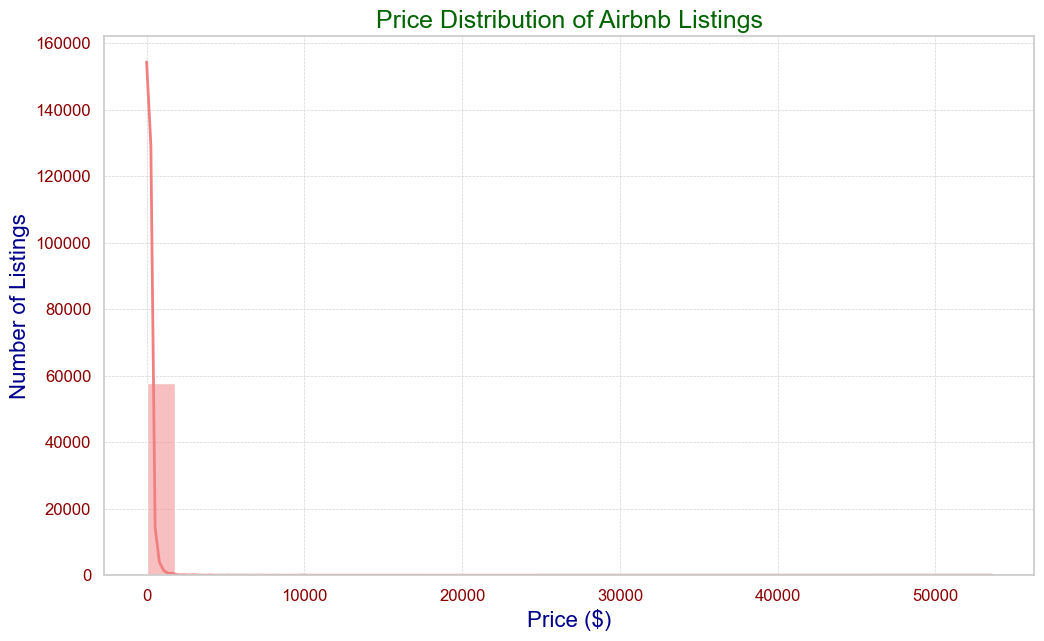

In [21]:
# Set Seaborn style for a clean and elegant appearance
sns.set(style="whitegrid")

# Set up the figure size
plt.figure(figsize=(12, 7))

# Create a histogram for the price distribution with improved aesthetics
sns.histplot(airbnb_listing_df['price'], bins=30, color='lightcoral', kde=True, line_kws={'color': 'darkred', 'lw': 2})

# Add labels and a title with enhanced styling
plt.xlabel('Price ($)', fontsize=16, color='darkblue')
plt.ylabel('Number of Listings', fontsize=16, color='darkblue')
plt.title('Price Distribution of Airbnb Listings', fontsize=18, color='darkgreen')

# Customize the grid and ticks for a polished look
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

# Show the plot
plt.show()

From the chart above, we observe that most prices are concentrated below $10,000, suggesting the presence of potential outliers. To confirm this more precisely, we will use a scatter plot for a clearer visualization of these outliers.

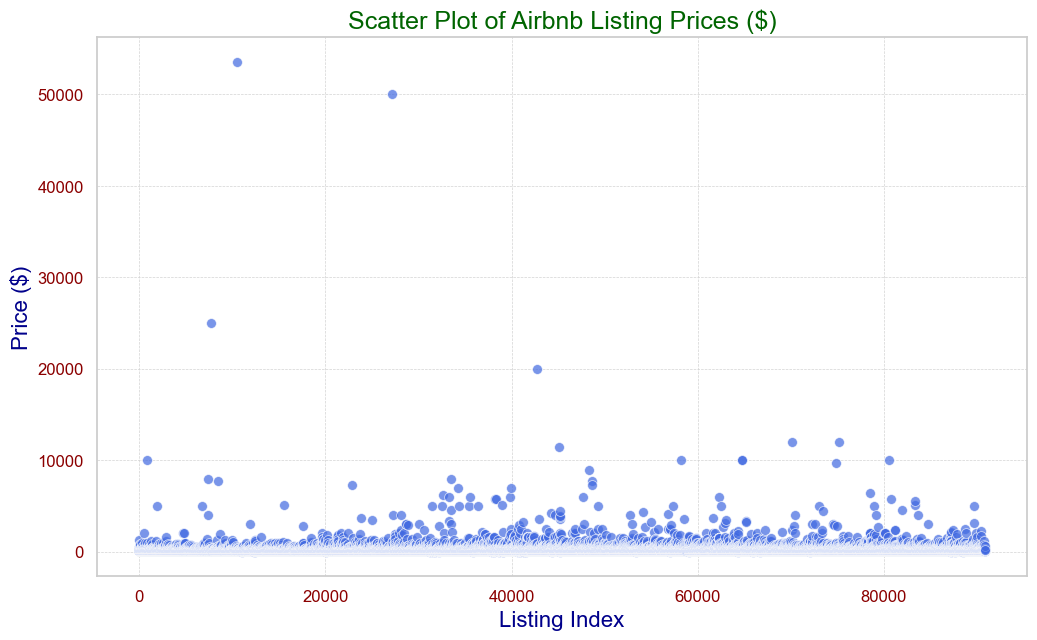

In [22]:
# Set Seaborn style for a bright and appealing appearance
sns.set(style="whitegrid", palette="pastel")

# Set up the figure size
plt.figure(figsize=(12, 7))

# Create a scatter plot for the price
sns.scatterplot(data=airbnb_listing_df, x=airbnb_listing_df.index, y='price', color='royalblue', s=50, alpha=0.7, edgecolor='w')

# Add labels and a title
plt.xlabel('Listing Index', fontsize=16, color='darkblue')
plt.ylabel('Price ($)', fontsize=16, color='darkblue')
plt.title('Scatter Plot of Airbnb Listing Prices ($)', fontsize=18, color='darkgreen')

# Customize the grid and ticks for a polished look
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

# Show the plot
plt.show()

The scatter plot reinforces our observations from the histogram, clearly identifying outliers in the pricing data. To ensure a more accurate analysis, we will remove these outliers and then replot the histogram for a refined view of the price distribution.

In [24]:
# Set Seaborn style for a bright and appealing appearance
sns.set(style="whitegrid", palette="pastel")

# Define a function to remove outliers based on a specified threshold
def remove_outliers(df, column, threshold):
    return df[df[column] <= threshold]

# Remove outliers where the price is greater than $1,000
airbnb_cleaned_df = remove_outliers(airbnb_listing_df, 'price', 1000)
airbnb_cleaned_df.head()

neighbourhood  availability_365  latitude  longitude                property_type        room_type  accommodates  bathrooms  bedrooms  beds                                          amenities  price  review_scores_rating  review_scores_location
0            London, England, United Kingdom                81  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  160.0                  4.96                    4.89
1  Islington, Greater London, United Kingdom               351  51.56861   -0.11270  Private room in rental unit     Private room             1        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...   65.0                  4.80                    4.70
2                     London, United Kingdom                88  51.48780   -0.16813           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  120.0                  4.80                    4.93
3           Lambeth, England, United Kingdom               268  51.46788   -0.09993  Private room in rental unit     Private room             2        1.0       1.0   1.0  ["Shampoo", "Dishwasher", "Fire extinguisher",...   65.0                  4.72                    4.34
4        Kensington, England, United Kingdom                 3  51.51735   -0.21076           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...  100.0                  4.74                    4.87

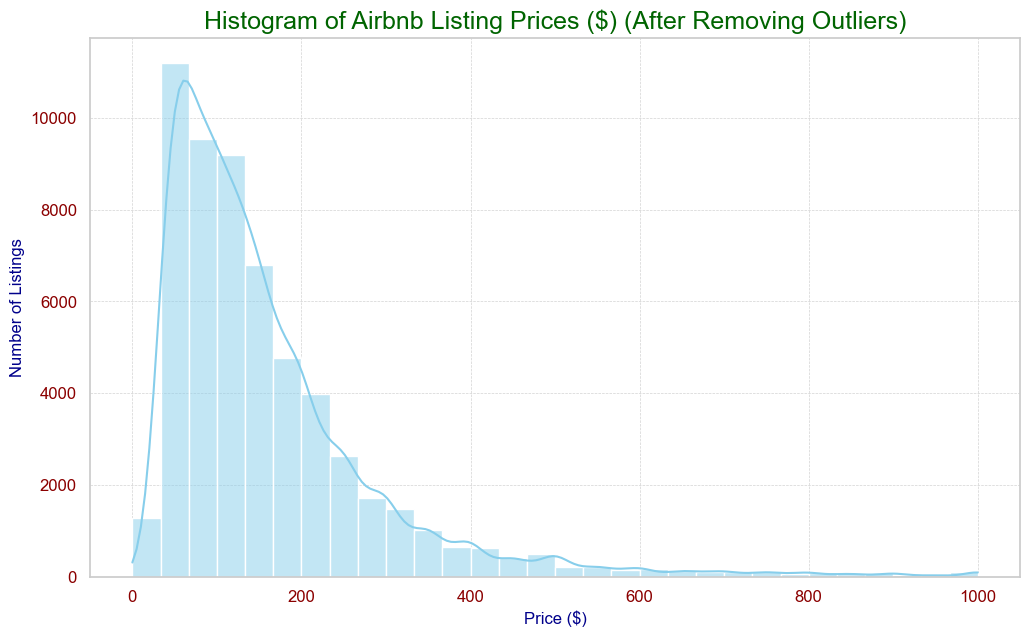

In [25]:
# Set Seaborn style for a bright and appealing appearance
sns.set(style="whitegrid", palette="pastel")

# Set up the figure size
plt.figure(figsize=(12, 7))

# Create a histogram for the price distribution
sns.histplot(data=airbnb_cleaned_df, x='price', bins=30, color='skyblue', kde=True)

# Add labels and a title
plt.xlabel('Price ($)', fontsize=12, color='darkblue')
plt.ylabel('Number of Listings', fontsize=12, color='darkblue')
plt.title('Histogram of Airbnb Listing Prices ($) (After Removing Outliers)', fontsize=18, color='darkgreen')

# Customize the grid and ticks for a polished look
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

# Show the plot
plt.show()

Outliers has been successfully rmeoved from our data

Amenitites Data Extraction

To analyze the impact of amenities on pricing, I'll create a separate DataFrame specifically for amenities. This will allow me to examine individual amenities and their correlation with the 'price' column. By isolating amenities, I can gain insights into which features are most influential in determining property prices.

In [26]:
# grab the amenities and price column from the main datasets
airbnb_amenities = pd.DataFrame()
airbnb_amenities= airbnb_cleaned_df[['amenities']]

# Convert `amenities` from string to a list
airbnb_amenities['amenities'] = airbnb_amenities['amenities'].apply(lambda x: ast.literal_eval(x))

# Collect all unique amenities
all_amenities = set()
for amenities_list in airbnb_amenities['amenities']:
    all_amenities.update(amenities_list)

# Create binary columns for each unique amenity
for amenity in all_amenities:
    airbnb_amenities[amenity] = airbnb_amenities['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original 'amenities' column as it's no longer needed
airbnb_amenities.drop('amenities', axis=1, inplace=True)

# preview the new amenities dataframe created
airbnb_amenities.head()

HAIR conditioner  Indesit stainless steel induction stove  Shower Gel and tablet soap body soap  Welcome pack conditioner  Paid valet parking on premises – 80 spaces  You & I shampoo  Not sure refrigerator  Head & Shuolders conditioner  SIEMENS refrigerator  55" HDTV with Amazon Prime Video, Apple TV, Netflix, premium cable, standard cable  Not sure yet  shampoo  32" HDTV with standard cable, Netflix  Fast wifi – 677 Mbps  65" HDTV with standard cable, Amazon Prime Video, Netflix  Range master  stainless steel double oven  Bose Bluetooth sound system  HDTV with Netflix, Fire TV  The White Company conditioner  Aesop  shampoo  Haed and sholders conditioner  50" HDTV with DVD player, Netflix, Amazon Prime Video, Apple TV  Paid pack ’n play/travel crib - always at the listing  Ted baker body soap  Cambridge audio Bluetooth sound system  Hotel Style body soap  32" HDTV with Amazon Prime Video, Chromecast, Netflix  Bungalow New World gas stove  42" HDTV with Chromecast  75" HDTV with Amazon Prime Video, Fire TV, Disney+, Netflix, Apple TV  50" HDTV with premium cable, standard cable  75" HDTV with Netflix, premium cable  Nereus shampoo  47" HDTV with standard cable, DVD player  35" HDTV with Netflix, standard cable  Aesops conditioner  Zanussi  stainless steel oven  Hoove stainless steel gas stove  Natural mini size shampoo  Paid standalone high chair - available upon request  Electrolux  electric stove  TRESemme' shampoo  Lamona stainless steel oven  Fast wifi – 568 Mbps  Siemens Miele  oven  70" HDTV with Netflix  Russell Hobb single oven  Fan Oven oven  NEFF refrigerator  Tiger shampoo  TV with Netflix, Amazon Prime Video  ...  Fast wifi – 495 Mbps  24" TV with Amazon Prime Video, Netflix, standard cable  DeLonghi oven  Care body soap  48" HDTV with Netflix, Apple TV  Multiple  body soap  Mydffai from Wales conditioner  Eco refill conditioner  Housekeeping available 24 hours, 4 days a week - available at extra cost  With small freezer compartment  refrigerator  Game console: Nintendo Wii, Nintendo Wii U, PS2, and Xbox One  55" HDTV with Amazon Prime Video, premium cable, Netflix, Chromecast  32" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, Netflix, standard cable  Range Master stainless steel oven  Variety of different brands  shampoo  Housekeeping available every day - available at extra cost  Philip Kingsley conditioner  50" HDTV with standard cable, premium cable  X stove  Private backyard  Shared hot tub - available all year, open 24 hours  Assrt shampoo  Tresumme body soap  White company or similar body soap  Bang & olufsen  Bluetooth sound system  Coffee maker: drip coffee maker, Nespresso  Britannia range cooker stainless steel gas stove  N/A stainless steel oven  LG stainless steel oven  Eco- Boutique  conditioner  Various options - let me know what you'd like? Bluetooth sound system  46" HDTV with Amazon Prime Video, Apple TV, Disney+, Netflix, DVD player  Waitros conditioner  36" TV  Harman Kardon Bluetooth sound system  27" HDTV with Netflix, Disney+  Hoob double oven  Sanex sulphates free body wash body soap  32" TV with Amazon Prime Video, Disney+, Netflix  Neff  double oven  Fast wifi – 97 Mbps  Body soap  Bosch fridge/ freezer refrigerator  43" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, HBO Max, Hulu, Netflix, Roku  Imperial cousins  body soap  TV with Amazon Prime Video, Disney+, Netflix, premium cable  HDTV with Disney+, Netflix, Apple TV, Amazon Prime Video, premium cable  HDTV with Netflix, Fire TV, Amazon Prime Video, standard cable  48" HDTV with Fire TV  Miscellaneous  body soap
0                 0                                        0                                     0                         0                                           0                0                      0                             0                     0                                                  0                                                       0                                      0   

In [27]:
airbnb_amenities.columns

Index(['HAIR conditioner', 'Indesit stainless steel induction stove',
       'Shower Gel and tablet soap body soap', 'Welcome pack conditioner',
       'Paid valet parking on premises – 80 spaces', 'You & I shampoo',
       'Not sure refrigerator', 'Head & Shuolders conditioner',
       'SIEMENS refrigerator',
       '55" HDTV with Amazon Prime Video, Apple TV, Netflix, premium cable, standard cable',
       ...
       'Fast wifi – 97 Mbps', 'Body soap',
       'Bosch fridge/ freezer refrigerator',
       '43" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, HBO Max, Hulu, Netflix, Roku',
       'Imperial cousins  body soap',
       'TV with Amazon Prime Video, Disney+, Netflix, premium cable',
       'HDTV with Disney+, Netflix, Apple TV, Amazon Prime Video, premium cable',
       'HDTV with Netflix, Fire TV, Amazon Prime Video, standard cable',
       '48" HDTV with Fire TV', 'Miscellaneous  body soap'],
      dtype='object', length=9027)

In [28]:
# check the total unique attributes used
len(airbnb_amenities.columns)

9027

Following the separation of amenities listed in the data into individual components, we identified over 9,000 distinct amenity types offered across various properties.

In [29]:
# Sum the values across all rows for each amenity (i.e., sum columns)
amenities_sum = airbnb_amenities.sum(axis=0)

# Create a new DataFrame with 'Amenity' and 'Total'
amenities_summary = pd.DataFrame({
    'Amenity': amenities_sum.index,
    'Total': amenities_sum.values
})

# Display the resulting DataFrame
print(amenities_summary)

                                                Amenity  Total
0                                      HAIR conditioner      1
1               Indesit stainless steel induction stove      1
2                  Shower Gel and tablet soap body soap      1
3                              Welcome pack conditioner      1
4            Paid valet parking on premises – 80 spaces      1
...                                                 ...    ...
9022  TV with Amazon Prime Video, Disney+, Netflix, ...      3
9023  HDTV with Disney+, Netflix, Apple TV, Amazon P...      1
9024  HDTV with Netflix, Fire TV, Amazon Prime Video...      1
9025                              48" HDTV with Fire TV      3
9026                           Miscellaneous  body soap      1

[9027 rows x 2 columns]


###

#### Housing Prices Data
The house price data was downloaded from Kaggle. This dataset contains information from the UK House Price Index (UKHPI), sourced from the HM Land Registry and the Office for National Statistics (ONS).

Link to the datasets: https://www.kaggle.com/datasets/willianoliveiragibin/uk-property-price-data-1995-2023-04/data

To enhance efficiency, we've incorporated the Polars library. We observed a significant improvement in data loading speed compared to Pandas, especially when dealing with large datasets. For instance, a dataset with over 28 million rows took nearly an hour to load using Pandas but was processed in less than 30 seconds with Polars. This demonstrates Polars' superior performance for handling extensive data volumes.

In [30]:
# Define the schema for the property price data
schema = {
    'Transaction_unique_identifier': pl.String,
    'price': pl.Int64,
    'Date_of_Transfer': pl.Datetime,
    'postcode': pl.String,
    'Property_Type': pl.String,
    'Old/New': pl.String,
    'Duration': pl.Int64,
    'PAON': pl.String,
    'SAON': pl.String,
    'Street': pl.String,
    'Locality': pl.String,
    'Town/City': pl.String,
    'District': pl.String,
    'County': pl.String,
    'PPDCategory_Type': pl.String,
    'Record_Status - monthly_file_only': pl.String
}

# Path to the property price CSV file
property_price_path = "data/UK Property Price data 1995-2023-04/202304.csv"

# Read the CSV file into a Polars DataFrame, specifying the schema and handling potential errors
property_price = pl.read_csv(
    property_price_path,
    ignore_errors=True,
    truncate_ragged_lines=True,
    has_header=False,
    schema_overrides=schema
)

# Print the DataFrame to inspect the loaded data
print(property_price)

shape: (28_276_228, 16)
┌────────────┬────────┬────────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ price  ┆ Date_of_Tr ┆ postcode ┆ … ┆ District   ┆ County    ┆ PPDCatego ┆ Record_St │
│ n_unique_i ┆ ---    ┆ ansfer     ┆ ---      ┆   ┆ ---        ┆ ---       ┆ ry_Type   ┆ atus -    │
│ dentifier  ┆ i64    ┆ ---        ┆ str      ┆   ┆ str        ┆ str       ┆ ---       ┆ monthly_f │
│ ---        ┆        ┆ datetime[μ ┆          ┆   ┆            ┆           ┆ str       ┆ ile_o…    │
│ str        ┆        ┆ s]         ┆          ┆   ┆            ┆           ┆           ┆ ---       │
│            ┆        ┆            ┆          ┆   ┆            ┆           ┆           ┆ str       │
╞════════════╪════════╪════════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ {F887F88E- ┆ 70000  ┆ 1995-07-07 ┆ MK15 9HP ┆ … ┆ MILTON     ┆ MILTON    ┆ A         ┆ A         │
│ 7D15-4415- ┆        ┆ 00:00:00   ┆          ┆   ┆ KEYNES     ┆ KE

Create a new column named year derived from the Date_of_Transfer column. This will allow us to easily filter the data by year.

In [31]:
# Create a new column named 'year' by extracting the year from the 'Date_of_Transfer' column.
property_price = property_price.with_columns(
    pl.col('Date_of_Transfer').dt.year().alias('year')  # Extract the year and store it in a new column called 'year'.
)

# Display the first row of the updated DataFrame to inspect the changes.
property_price[0]

shape: (1, 17)
┌──────────────┬───────┬──────────────┬──────────┬───┬────────┬──────────────┬──────────────┬──────┐
│ Transaction_ ┆ price ┆ Date_of_Tran ┆ postcode ┆ … ┆ County ┆ PPDCategory_ ┆ Record_Statu ┆ year │
│ unique_ident ┆ ---   ┆ sfer         ┆ ---      ┆   ┆ ---    ┆ Type         ┆ s - monthly_ ┆ ---  │
│ ifier        ┆ i64   ┆ ---          ┆ str      ┆   ┆ str    ┆ ---          ┆ file_o…      ┆ i32  │
│ ---          ┆       ┆ datetime[μs] ┆          ┆   ┆        ┆ str          ┆ ---          ┆      │
│ str          ┆       ┆              ┆          ┆   ┆        ┆              ┆ str          ┆      │
╞══════════════╪═══════╪══════════════╪══════════╪═══╪════════╪══════════════╪══════════════╪══════╡
│ {F887F88E-7D ┆ 70000 ┆ 1995-07-07   ┆ MK15 9HP ┆ … ┆ MILTON ┆ A            ┆ A            ┆ 1995 │
│ 15-4415-804E ┆       ┆ 00:00:00     ┆          ┆   ┆ KEYNES ┆              ┆              ┆      │
│ -52EAC…      ┆       ┆              ┆          ┆   ┆        ┆              ┆              ┆      │
└──────────────┴───────┴──────────────┴──────────┴───┴────────┴──────────────┴──────────────┴──────┘

Check the unique property types in our dataset.

In [32]:
property_price.select(pl.col('Property_Type')).unique()

shape: (5, 1)
┌───────────────┐
│ Property_Type │
│ ---           │
│ str           │
╞═══════════════╡
│ T             │
│ O             │
│ S             │
│ D             │
│ F             │
└───────────────┘

Convert all property types from their shorthand codes to their full names. Below are the property type codes and their corresponding full meanings

Property types and their full meanings:
- D: Detached
- S: Semi-Detached
- T: Terraced
- F: Flats/Maisonettes
- O: Other

In [33]:
import polars as pl

# Create a mapping dictionary for the property types
property_type_mapping = {
    "D": "Detached",
    "S": "Semi-Detached",
    "T": "Terraced",
    "F": "Flats/Maisonettes",
    "O": "Other"
}

# Convert the dictionary to a Polars-friendly format
replacement_expr = pl.col("Property_Type").replace(property_type_mapping)

# Create a new column 'Property_Type_Full' by replacing the property types
property_price = property_price.with_columns(
    replacement_expr.alias("Property_Type_Full")
)

# Display the first row of the updated DataFrame to inspect the changes
print(property_price.head())


shape: (5, 18)
┌─────────────┬───────┬─────────────┬──────────┬───┬─────────────┬─────────────┬──────┬────────────┐
│ Transaction ┆ price ┆ Date_of_Tra ┆ postcode ┆ … ┆ PPDCategory ┆ Record_Stat ┆ year ┆ Property_T │
│ _unique_ide ┆ ---   ┆ nsfer       ┆ ---      ┆   ┆ _Type       ┆ us - monthl ┆ ---  ┆ ype_Full   │
│ ntifier     ┆ i64   ┆ ---         ┆ str      ┆   ┆ ---         ┆ y_file_o…   ┆ i32  ┆ ---        │
│ ---         ┆       ┆ datetime[μs ┆          ┆   ┆ str         ┆ ---         ┆      ┆ str        │
│ str         ┆       ┆ ]           ┆          ┆   ┆             ┆ str         ┆      ┆            │
╞═════════════╪═══════╪═════════════╪══════════╪═══╪═════════════╪═════════════╪══════╪════════════╡
│ {F887F88E-7 ┆ 70000 ┆ 1995-07-07  ┆ MK15 9HP ┆ … ┆ A           ┆ A           ┆ 1995 ┆ Detached   │
│ D15-4415-80 ┆       ┆ 00:00:00    ┆          ┆   ┆             ┆             ┆      ┆            │
│ 4E-52EAC…   ┆       ┆             ┆          ┆   ┆             ┆          

Extract the postcode district from the full postcode and store it in a new column. This will enable data aggregation at the postcode district level, allowing for more effective analysis and summarization based on postcode districts.

In [34]:
# Create a new column 'year' by extracting the postcode part before the space
property_price = property_price.with_columns(
    pl.col('postcode').str.extract(r'^(\S+)', 1).alias('postcode_district')
)

# Display the first row of the updated DataFrame to inspect the changes
print(property_price[0])

shape: (1, 19)
┌─────────────┬───────┬─────────────┬──────────┬───┬─────────────┬──────┬─────────────┬────────────┐
│ Transaction ┆ price ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Stat ┆ year ┆ Property_Ty ┆ postcode_d │
│ _unique_ide ┆ ---   ┆ nsfer       ┆ ---      ┆   ┆ us - monthl ┆ ---  ┆ pe_Full     ┆ istrict    │
│ ntifier     ┆ i64   ┆ ---         ┆ str      ┆   ┆ y_file_o…   ┆ i32  ┆ ---         ┆ ---        │
│ ---         ┆       ┆ datetime[μs ┆          ┆   ┆ ---         ┆      ┆ str         ┆ str        │
│ str         ┆       ┆ ]           ┆          ┆   ┆ str         ┆      ┆             ┆            │
╞═════════════╪═══════╪═════════════╪══════════╪═══╪═════════════╪══════╪═════════════╪════════════╡
│ {F887F88E-7 ┆ 70000 ┆ 1995-07-07  ┆ MK15 9HP ┆ … ┆ A           ┆ 1995 ┆ Detached    ┆ MK15       │
│ D15-4415-80 ┆       ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆             ┆            │
│ 4E-52EAC…   ┆       ┆             ┆          ┆   ┆             ┆      ┆   

Extract all the years to determine the total duration for which the data was collected.

In [35]:
# Extract the unique years from the 'year' column to determine the total number of years data was collected.
year_building_sold = property_price.select(pl.col("year")).unique()

# Print the total number of years data was collected.
print("Total years data was collected:", len(year_building_sold), 'years')

# Display the list of unique years.
print(year_building_sold.to_series().to_list())

Total years data was collected: 29 years
[2001, 1998, 1995, 2004, 2007, 2016, 2010, 2013, 2022, 2019, 1999, 2005, 2008, 1996, 2002, 2011, 2023, 2017, 2014, 2020, 1997, 2006, 2018, 2003, 2000, 2015, 2009, 2012, 2021]


To analyze trends in London over the past decade, we will focus on data from 2013 to 2023. While the original dataset spans from 1995 to 2023, we will filter the records to include only those from London and within this specified time range. This will enable us to examine trends in building sales in London specifically during this period.

In [36]:
# Filter the dataset to include only records from London and for the years 2013 to 2023.
london_property_price = property_price.filter(
    (pl.col("year") >= 2013) &  # Include records from the year 2013 onwards.
    (pl.col("Town/City") == "LONDON")  # Include only records where the 'Town/City' is 'LONDON'.
)

# Print the filtered dataset to inspect the results.
print(london_property_price)

shape: (708_864, 19)
┌─────────────┬─────────┬─────────────┬──────────┬───┬────────────┬──────┬────────────┬────────────┐
│ Transaction ┆ price   ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Sta ┆ year ┆ Property_T ┆ postcode_d │
│ _unique_ide ┆ ---     ┆ nsfer       ┆ ---      ┆   ┆ tus - mont ┆ ---  ┆ ype_Full   ┆ istrict    │
│ ntifier     ┆ i64     ┆ ---         ┆ str      ┆   ┆ hly_file_o ┆ i32  ┆ ---        ┆ ---        │
│ ---         ┆         ┆ datetime[μs ┆          ┆   ┆ …          ┆      ┆ str        ┆ str        │
│ str         ┆         ┆ ]           ┆          ┆   ┆ ---        ┆      ┆            ┆            │
│             ┆         ┆             ┆          ┆   ┆ str        ┆      ┆            ┆            │
╞═════════════╪═════════╪═════════════╪══════════╪═══╪════════════╪══════╪════════════╪════════════╡
│ {BADC1CBC-8 ┆ 620000  ┆ 2013-02-14  ┆ W9 1BE   ┆ … ┆ A          ┆ 2013 ┆ Flats/Mais ┆ W9         │
│ C1C-4AD8-AA ┆         ┆ 00:00:00    ┆          ┆   ┆            ┆   

Between 2013 and 2023, 708,864 properties were included in the dataset, with their prices specifically tracked during this period.

###

#### Shortlet Market
The short-let market rent data was downloaded from Rightmove and OnTheMarket. We were able to scrape sales and rental data from the past 7 days, but due to platform limitations, we could only access data for a maximum of 7 days at a time. A Selenium-based Python scraper was developed to collect and clean this data.

Sources:
- Rightmove.co.uk
- OnTheMarket

In [37]:
# Load the data from Rightmove and OnTheMarket CSV files into DataFrames.
rightmove_data = pd.read_csv(rightmove_path)  # Load Rightmove data.
omt_data = pd.read_csv(omt_path)  # Load OnTheMarket data.

# Merge the two DataFrames into a single DataFrame.
merged_data = pd.concat([omt_data, rightmove_data])  # Concatenate the datasets.

# Display the first few rows of the merged DataFrame to inspect the result.
merged_data.head()

transaction                        address  bedroom  bathroom  sales_price  rent_perMonth  rent_perWeek                         description propertyType  location                 agent listing_source                                    listing_url      listed_date
0        rent  Vanderbilt Road, London, SW18      5.0       3.0          NaN         4750.0        1096.0    5 bedroom terraced house to rent     Terraced      SW18  Savills - Wandsworth            omt  https://www.onthemarket.com/details/15383726/  Added > 14 days
1        rent         Joyners Close Dagenham      2.0       1.0          NaN         1900.0         438.0    2 bedroom terraced house to rent     Terraced  Dagenham                   NaN            omt  https://www.onthemarket.com/details/15695892/      Added today
2        rent      Tritton Road, London SE21      1.0       1.0          NaN          750.0         173.0   1 bedroom in a flat share to rent         Flat      SE21                   NaN            omt  https://www.onthemarket.com/details/15695809/      Added today
3        rent    Malden Road, New Malden KT3      1.0       1.0          NaN          750.0         173.0  1 bedroom in a house share to rent        House       KT3                   NaN            omt  https://www.onthemarket.com/details/15695582/      Added today
4        rent      Avon Road, Upminster RM14      2.0       1.0          NaN         1700.0         392.0         2 bedroom apartment to rent    Apartment      RM14                   NaN            omt  https://www.onthemarket.com/details/15681803/      Added today

In [38]:
# Fill missing values with 0 in the merged dataset.
merged_data = merged_data.fillna(0)  # Replace NaN values with 0.

# Create new columns to differentiate between sales and rental listings.
merged_data['sales'] = merged_data['transaction'].apply(lambda x: 1 if x == 'sales' else 0)  # Mark sales transactions with 1.
merged_data['rent'] = merged_data['transaction'].apply(lambda x: 1 if x == 'rent' else 0)  # Mark rent transactions with 1.

# Drop unwanted columns that are not needed for the analysis.
listing_df = merged_data.drop(columns=['description', 'agent', 'listing_source', 'listing_url', 
                                       'transaction', 'listed_date'], axis=1)  # Remove specified columns.

# Display the first few rows of the DataFrame to inspect the result.
listing_df.head()


address  bedroom  bathroom  sales_price  rent_perMonth  rent_perWeek propertyType  location  sales  rent
0  Vanderbilt Road, London, SW18      5.0       3.0          0.0         4750.0        1096.0     Terraced      SW18      0     1
1         Joyners Close Dagenham      2.0       1.0          0.0         1900.0         438.0     Terraced  Dagenham      0     1
2      Tritton Road, London SE21      1.0       1.0          0.0          750.0         173.0         Flat      SE21      0     1
3    Malden Road, New Malden KT3      1.0       1.0          0.0          750.0         173.0        House       KT3      0     1
4      Avon Road, Upminster RM14      2.0       1.0          0.0         1700.0         392.0    Apartment      RM14      0     1

In [39]:
# Filter the DataFrame to include only rental data
rent_listing_df = listing_df[listing_df['rent'] == 1]
len(rent_listing_df)

1900

We will geocode the address locations in the rental data to obtain their geographic coordinates (latitude and longitude). This process will involve converting each address into coordinates, which will then be added to our dataset. This additional information will enable us to conduct more detailed spatial analyses and visualizations.

In [40]:
# Filter the DataFrame to include only rental data.
rent_listing_df = listing_df[listing_df['rent'] == 1]  # Keep only rows where 'rent' column is 1.

# Initialize the geolocator for geocoding addresses.
geolocator = Nominatim(user_agent="rentagentgeocode")

# Function to geocode an address and return latitude and longitude.
def geocode_address(address):
    try:
        location = geolocator.geocode(address,timeout=300,limit=3000)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding address: {address} - {e}")
        return None, None

# Apply geocoding to the addresses in the rental data.
rent_listing_df[['latitude', 'longitude']] = rent_listing_df['address'].apply(lambda x: pd.Series(geocode_address(x)))

# Display the first few rows of the DataFrame with the added latitude and longitude columns.
rent_listing_df.head()


address  bedroom  bathroom  sales_price  rent_perMonth  rent_perWeek propertyType  location  sales  rent   latitude  longitude
0  Vanderbilt Road, London, SW18      5.0       3.0          0.0         4750.0        1096.0     Terraced      SW18      0     1  51.445025  -0.189330
1         Joyners Close Dagenham      2.0       1.0          0.0         1900.0         438.0     Terraced  Dagenham      0     1  51.552845   0.143878
2      Tritton Road, London SE21      1.0       1.0          0.0          750.0         173.0         Flat      SE21      0     1        NaN        NaN
3    Malden Road, New Malden KT3      1.0       1.0          0.0          750.0         173.0        House       KT3      0     1  51.393315  -0.253136
4      Avon Road, Upminster RM14      2.0       1.0          0.0         1700.0         392.0    Apartment      RM14      0     1        NaN        NaN

In [41]:
rent_listing_df.latitude.value_counts()

latitude
36.391181    30
51.514193    15
51.520492     9
51.519637     9
51.504249     6
             ..
51.545977     1
51.518341     1
51.562342     1
51.530434     1
51.486866     1
Name: count, Length: 567, dtype: int64

###

#### Selecting the best Boundary level to visualize our data

It was challenging to select an appropriate boundary level that would effectively visualize our data. We experimented with different boundary options to find the most suitable one.

LSOA (Lower Super Output Area)  Boundary of City of London

In [42]:
# Read the shapefile into a GeoDataFrame
lsao_boundary = gpd.read_file(london_lsao_path)

# Display the first few rows of the GeoDataFrame to inspect the data
lsao_boundary.head()


LSOA_CODE            LSOA_NAME  MSOA_CODE           MSOA_NAME STWARDCODE          STWARDNAME LA_CODE         LA_NAME                                           geometry
0  E01000001  City of London 001A  E02000001  City of London 001     00AAFA          Aldersgate    00AA  City of London  POLYGON ((532050.879 181817.674, 532021.188 18...
1  E01000002  City of London 001B  E02000001  City of London 001     00AAFQ         Cripplegate    00AA  City of London  POLYGON ((532267.748 181643.784, 532254.565 18...
2  E01000003  City of London 001C  E02000001  City of London 001     00AAFQ         Cripplegate    00AA  City of London  POLYGON ((532071.310 182159.597, 532135.127 18...
3  E01000004  City of London 001D  E02000001  City of London 001     00AAFT  Farringdon Without    00AA  City of London  POLYGON ((531172.252 181124.643, 531133.747 18...
4  E01000005  City of London 001E  E02000001  City of London 001     00AAFX           Portsoken    00AA  City of London  POLYGON ((533378.878 181459.767, 533439.561 18...

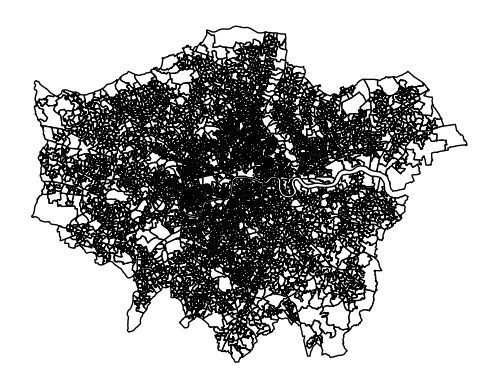

In [43]:
# Plot the LSOA boundaries
lsao_boundary.plot(color='white', edgecolor='black')

# Remove axis and grid
plt.axis('off')
plt.grid(False)

# Show the plot
plt.show()

The LSOA boundaries in London were too clustered, leading to dense and overlapping areas. We sought a clearer and more defined boundary to enhance the visualization of our data.

Ward Boundary of City of London

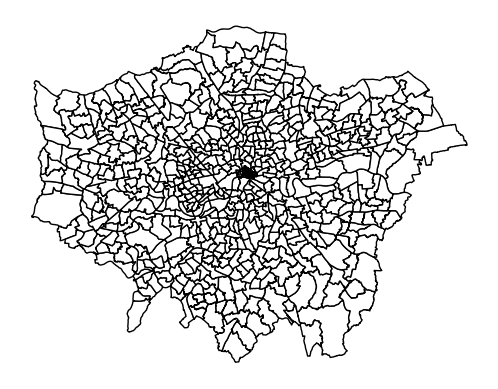

In [44]:
# Read the shapefile into a GeoDataFrame
ward_boundary = gpd.read_file(ward_path)

# viz data
ward_boundary.plot(color='white', edgecolor='black')

# Remove axis and grid
plt.axis('off')
plt.grid(False)

# Show the plot
plt.show()


The ward boundaries appear suitable for our needs, but the UK property price data lacks coordinates. It is impractical to use a free geocoding system for over 700,000 addresses due to limitations on batch geocoding. Therefore, we decided to use postcode districts as a more feasible alternative.

Postcode District Boundary

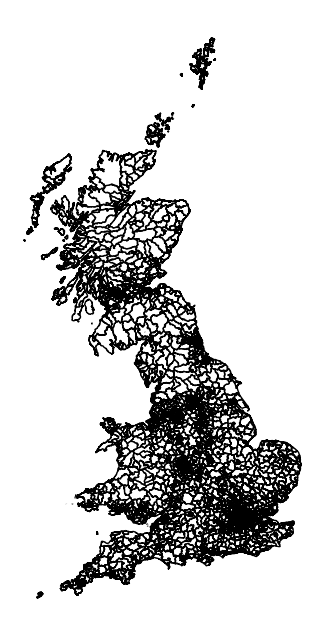

In [45]:
# Read the shapefile into a GeoDataFrame
postaldistrict_boundary = gpd.read_file(postcode_district_path)

# Display the first few rows of the GeoDataFrame to inspect the data
postaldistrict_boundary.plot(color='white', edgecolor='black', figsize=(10,8))

# Remove axis and grid
plt.axis('off')
plt.grid(False)

# Show the plot
plt.show()


We chose to use postcode district boundaries because they provide clarity and align well with one of our primary datasets. Since we extracted postcode districts from postcode units, this boundary format accommodates all our data effectively. However, the challenge now is that the data covers the entire UK, so we need to clip it to our area of interest. To address this, we dissolved the ward shapefile to create a single boundary and used it to clip our data accordingly.

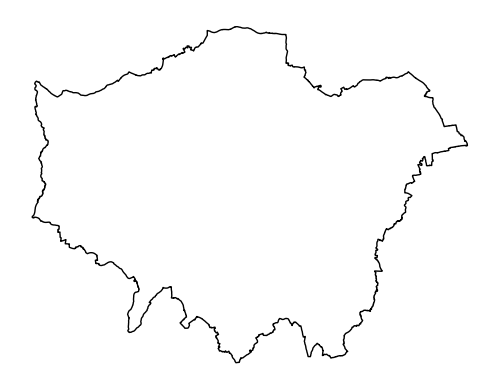

In [46]:
ward_boundary['dissolved_col'] = 1
ward_boundary_dissolved = ward_boundary.dissolve(by='dissolved_col')
ward_boundary_dissolved.plot(color='white', edgecolor='black')

# Remove axis and grid
plt.axis('off')
plt.grid(False)

# Show the plot
plt.show()


Let's clip the entire UK postcode district boundary to include only the London area

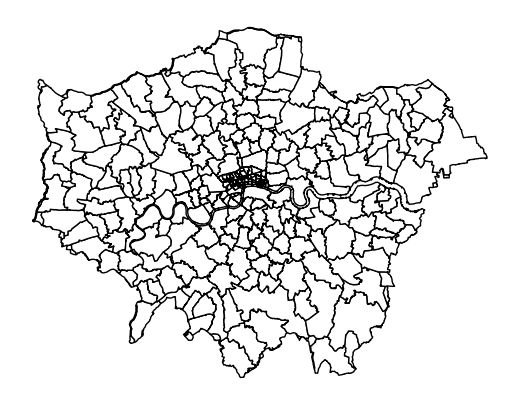

In [47]:
# convert the two data to the same cordinate reference system
ward_boundary_dissolved.to_crs(epsg=4326, inplace=True)
postaldistrict_boundary.to_crs(epsg=4326, inplace=True)

# clip the postal code boundary to oly london alone
london_postal_district = postaldistrict_boundary.clip(ward_boundary_dissolved)
london_postal_district.plot(color='white', edgecolor='black', figsize=(10,5))

# Remove axis and grid
plt.axis('off')
plt.grid(False)

# Show the plot
plt.show()



In [48]:
len(london_postal_district)

300

In [49]:
# check the columns present
london_postal_district.columns

Index(['DistID', 'PostDist', 'PostArea', 'DistNum', 'PCCnt', 'AnomCnt',
       'RefPC', 'x', 'y', 'Sprawl', 'Locale', 'geometry'],
      dtype='object')

In [50]:
# rename the PostDist to be the same as the postcode district becaus thatwhat the data will be joined on
london_postal_district.rename(columns={'PostDist':'postcode_district'},
                              inplace=True)

london_postal_district.head()

DistID postcode_district PostArea DistNum  PCCnt  AnomCnt    RefPC       x       y       Sprawl    Locale                                           geometry
1156    1157              KT18       KT      18    503        1  KT185NQ  521232  158569        Epsom      None  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...
435      436               CR5       CR       5    671        0   CR51RE  529657  158437       London  Coulsdon  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...
1161    1162              KT22       KT      22    917        0  KT227TJ  515896  157086  Leatherhead      None  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...
2223    2224               SM7       SM       7    475        0   SM72NP  525451  159743     Banstead      None  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...
1155    1156              KT17       KT      17    752        1  KT171LA  521922  161759        Epsom      None  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...

In [51]:
# drop some columns that are not useful to us
london_postal_district.drop(columns=['DistNum','PCCnt', 'AnomCnt',
       'RefPC', 'x', 'y','Locale'],inplace=True)

london_postal_district.head()

DistID postcode_district PostArea       Sprawl                                           geometry
1156    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...
435      436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...
1161    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...
2223    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...
1155    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...

### Demographic Datasets

* Average Household Income: We have obtained average income data for MSOA (Middle Layer Super Output Areas). This dataset provides insights into the typical income levels within each MSOA, which will help in understanding the economic conditions of different areas.

* Population Density: The population density data has been sourced for LSAO (Lower Layer Super Output Areas). This dataset offers information on the number of people per unit area in each LSAO, allowing us to analyze the distribution of the population across various regions.

* Unemployment Rate: Unemployment data for LSAO has been acquired. This dataset reveals the percentage of the workforce that is unemployed within each LSAO, providing a measure of economic health and employment conditions in different areas.

Data Source: 
- Average Household Income: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/smallareaincomeestimatesformiddlelayersuperoutputareasenglandandwales

- Population Density and Unemployment Rate:https://download.ons.gov.uk/downloads/datasets/

We are aggregating the demographic data because population density and unemployment data are not available at the postal code area level. Instead, we have this data at the LSOA level, and average household income data at the MSOA level, which are more granular than postal districts. To address this, we will merge the demographic data at the LSOA and MSOA levels, and then aggregate these values to align with postal district boundaries. Finally, we will compute the sum of the relevant metrics and join the aggregated data back to the postal district boundaries, enabling a more comprehensive analysis at the postal district level.

##### load the population density data

In [52]:
# Load the population density dataset for LSOA level from the specified file path.
lsoa_pop_den = pd.read_csv(lsoa_pop_den_path)

# View the LSOA population density data.
lsoa_pop_den.head()  

date        geography geography code  Population Density
0  2021  Hartlepool 001A      E01011954              5432.9
1  2021  Hartlepool 001B      E01011969              1430.7
2  2021  Hartlepool 001C      E01011970              2913.9
3  2021  Hartlepool 001D      E01011971              6049.4
4  2021  Hartlepool 001F      E01033465              4311.9

##### load the unemployment data

In [53]:
# Load the unemployment data for LSOA level from the specified file path.
unemployment_lsoa = pd.read_csv(unemployment_lsoa_path)

# View the LSOA unemployment data.
unemployment_lsoa.head()  

date                  geography geography code  Total Unemployment
0  2021        City of London 001A      E01000001                 972
1  2021        City of London 001B      E01000002                 836
2  2021        City of London 001C      E01000003                1008
3  2021        City of London 001E      E01000005                 926
4  2021  Barking and Dagenham 016A      E01000006                1088

##### load the average household income density data

In [54]:
# Load the average household income data for MSOA level from the specified file path.
average_household_income_msao = pd.read_csv(avg_hh_income_msao_path)

# View the MSOA average household income data.
average_household_income_msao.head()  

MSOA code          MSOA name Average Anuual Income (£)
0  E02004297  County Durham 001                   41,400 
1  E02004290  County Durham 002                   41,100 
2  E02004298  County Durham 003                   44,300 
3  E02004299  County Durham 004                   35,400 
4  E02004291  County Durham 005                   34,500

##### load the population data

In [55]:
# Load the population LSAOA level from the specified file path.
population = pd.read_csv(population_lsao_path)

# View the data
population.head()  

LSOA 2021 Code   LSOA 2021 Name Total Population
0      E01011949  Hartlepool 009A            1,866
1      E01011950  Hartlepool 008A            1,094
2      E01011951  Hartlepool 007A            1,240
3      E01011952  Hartlepool 002A            1,620
4      E01011953  Hartlepool 002B            1,979

#### Aggregating of Demographics Data

In [56]:
# Calculate centroids for LSOA boundaries
lsao_boundary['centroid'] = lsao_boundary.geometry.centroid
lsao_boundary.geometry = lsao_boundary['centroid']
lsao_boundary_centroids = lsao_boundary.drop(columns=['centroid'])

# Rename column in population density DataFrame to match merge key
lsoa_pop_den.rename(columns={'geography code': 'LSOA_CODE'}, inplace=True)

# Merge centroid geometries with population density data
lsoa_pop_den = lsao_boundary_centroids.merge(lsoa_pop_den, how='left', on='LSOA_CODE')
lsoa_pop_den['Population Density'] = lsoa_pop_den['Population Density'].astype(str).str.replace(',', '').astype(float).fillna(0).astype(int) 
pop_den_lsoa_gdf = lsoa_pop_den[['geometry','Population Density']]
pop_den_lsoa_gdf.head()

geometry  Population Density
0  POINT (532150.800 181614.215)               11363
1  POINT (532443.477 181645.486)                6062
2  POINT (532206.760 182029.240)               27385
3  POINT (532419.705 181202.036)                   0
4  POINT (533618.339 181154.679)                5801

In [57]:
unemployment_lsoa.rename(columns={'geography code': 'LSOA_CODE'}, inplace=True)
population.rename(columns={'LSOA 2021 Code': 'LSOA_CODE'}, inplace=True)

# Merge with unemployment data
lsoa_umemploy = lsao_boundary_centroids.merge(unemployment_lsoa, how='left', on='LSOA_CODE')


# Merge the unemployment data with population data and fill missing values with 0
unemployment_rate_lsoa = lsoa_umemploy.merge(population, how='left', on='LSOA_CODE').fillna(0)

# Remove commas, convert to float, and replace NaN with 0 before converting to int
unemployment_rate_lsoa['Total Population'] = (
    unemployment_rate_lsoa['Total Population'].astype(str).str.replace(',', '').astype(float).fillna(0).astype(int)
)
unemployment_rate_lsoa['Total Unemployment'] = (
    unemployment_rate_lsoa['Total Unemployment'].astype(str).str.replace(',', '').astype(float).fillna(0).astype(int)
)

# Calculate the unemployment rate
unemployment_rate_lsoa['unemployment_rate'] = (
    unemployment_rate_lsoa['Total Unemployment'] / 
    unemployment_rate_lsoa['Total Population']
) * 100  # Multiply by 100 to get percentage

# Select and display relevant columns
unemployment_rate_lsoa__gdf  = unemployment_rate_lsoa[['geometry', 'unemployment_rate']]

# Display the DataFrame
print(unemployment_rate_lsoa__gdf.head())


# # Perform spatial join with London postcode district boundaries
# london_postal_district_v2 = gpd.sjoin(london_postal_district, lsoa_pop_den_gdf, how='left')


                        geometry  unemployment_rate
0  POINT (532150.800 181614.215)          56.478791
1  POINT (532443.477 181645.486)          51.990050
2  POINT (532206.760 182029.240)          55.202629
3  POINT (532419.705 181202.036)                NaN
4  POINT (533618.339 181154.679)          57.694704


In [58]:
average_household_income_msao.rename(columns={'MSOA code': 'MSOA_CODE'}, inplace=True)

# Merge with average household income data
avg_hd_income_msao =  lsao_boundary_centroids.merge(average_household_income_msao, how='left', on='MSOA_CODE')
avg_hd_income_msao['Average Anuual Income (£)'] = avg_hd_income_msao['Average Anuual Income (£)'].astype(str).str.replace(',', '').astype(float).fillna(0).astype(int)
avg_hd_income_msao_gdf = avg_hd_income_msao[['geometry','Average Anuual Income (£)']]
avg_hd_income_msao_gdf.head()

geometry  Average Anuual Income (£)
0  POINT (532150.800 181614.215)                     101800
1  POINT (532443.477 181645.486)                     101800
2  POINT (532206.760 182029.240)                     101800
3  POINT (532419.705 181202.036)                     101800
4  POINT (533618.339 181154.679)                     101800

###

#### Aggreagte all Aggregated Data to Spatial Boundaries

Merged All Aggregated Data with the Postal District Boundaries

The primary reason for using postal district boundaries is that the UK property data from the ONS is based on postcode units. Postcode units are very small and would make our maps cluttered and harder to interpret. By extracting and using postcode districts instead, we can create cleaner and more easily explainable maps.

Our next steps involve several key tasks:
1. **Merge the UK property price data** with the London postcode district boundaries.
2. **Merge the Airbnb analytics data** summarized by postcode districts with the same boundary dataset.
3. **Incorporate the short-let market data** we've collected into these boundaries.
4. **Add demographic data**—including unemployment rates, population density, and average income—into the merged dataset.

By combining all these datasets at the postcode district level, we will create a comprehensive and clean dataset, enabling us to conduct thorough and insightful analyses.

##### Merged the UK Property Price data with the postal district data

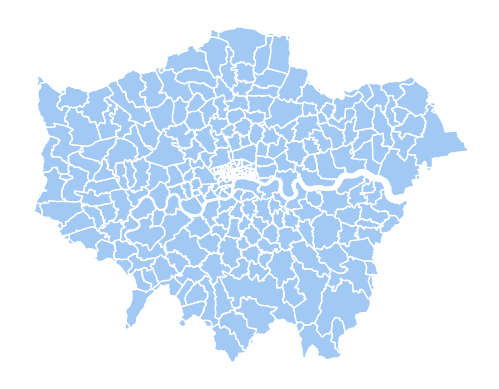

In [59]:
london_postal_district.plot()

# Remove axis and grid
plt.axis('off')
plt.grid(False)

# Show the plot
plt.show()


Create summary tables by aggregating property price data by postcode districts. Additionally, calculate the trends in property prices for different types of properties over time.

Calculate the median property prices from the UK dataset for the last 10 years.

In [60]:
# Create SQL context with our DataFrame
ctx = pl.SQLContext(property=property_price, eager=True)

# Execute the SQL query to get the the median prices of property types across various locations
query_1 = ctx.execute("SELECT MEDIAN(price) AS median_price, postcode_district\
                       FROM property GROUP BY postcode_district")

# Convert the result to a Pandas DataFrame
median_price = query_1.to_pandas()

median_price.head()

median_price postcode_district
0      260000.0               WR7
1      147500.0               S31
2      182500.0               SY7
3      115000.0               LS5
4      184500.0              PL35

Calculate the median prices for each of the five different types of houses, aggregated by postcode districts.

In [61]:
# Execute SQL query and load the data into a Pandas DataFrame
query_2 = ctx.execute("""
    SELECT postcode_district,
           Property_Type_Full,
           price
    FROM property
""")

# Convert the result to a Pandas DataFrame
df = query_2.to_pandas()

# Calculate median price for each property type
median_prices = (df
    .groupby(["postcode_district", "Property_Type_Full"])["price"]
    .median()
    .reset_index()
    .rename(columns={"price": "median_price"})
)

# Pivot the DataFrame
pivot_df = median_prices.pivot(
    index="postcode_district",
    columns="Property_Type_Full",
    values="median_price"
)

# Fill missing values with 0 if needed
price_property_type = pivot_df.fillna(0).reset_index()


# price_property_type = price_property_type.drop(columns= ["Property_Type_Full"],axis=1)

# Show the result
price_property_type.head()


Property_Type_Full postcode_district  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced
0                                AL1  582500.0           208000.0  558750.0       322900.0  270000.0
1                               AL10  338000.0           151000.0  490000.0       223000.0  185000.0
2                                AL2  415000.0           151000.0  462500.0       282500.0  235000.0
3                                AL3  478250.0           184000.0  552500.0       310000.0  279950.0
4                                AL4  420000.0           153000.0  566490.0       320000.0  220000.0

##### Merge all calculated KPIs with the polygon boundary data of the postcode districts.

In [62]:
london_postal_district = london_postal_district.merge(median_price, how='left', 
                                                      on='postcode_district')

london_postal_district = london_postal_district.merge(price_property_type, how='left', 
                                                      on='postcode_district')

london_postal_district.head()

DistID postcode_district PostArea       Sprawl                                           geometry  median_price  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced
0    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...      285000.0  450000.0           192500.0  657500.0       300000.0  263000.0
1     436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...      287000.0  452000.0           175000.0  350000.0       288000.0  233875.0
2    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...      299950.0  600000.0           199000.0  530000.0       275000.0  230000.0
3    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...      305000.0  470000.0           215000.0  394000.0       300000.0  249950.0
4    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...      278475.0  490000.0           195000.0  390000.0       328750.0  236000.0

Perform a spatial join between the Airbnb listings and the postcode district boundary file. This process will align each Airbnb listing with its corresponding postcode district, allowing us to analyze and visualize the distribution of Airbnb properties within specific geographic areas.

In [63]:
airbnb_cleaned_df.head()

neighbourhood  availability_365  latitude  longitude                property_type        room_type  accommodates  bathrooms  bedrooms  beds                                          amenities  price  review_scores_rating  review_scores_location
0            London, England, United Kingdom                81  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  160.0                  4.96                    4.89
1  Islington, Greater London, United Kingdom               351  51.56861   -0.11270  Private room in rental unit     Private room             1        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...   65.0                  4.80                    4.70
2                     London, United Kingdom                88  51.48780   -0.16813           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  120.0                  4.80                    4.93
3           Lambeth, England, United Kingdom               268  51.46788   -0.09993  Private room in rental unit     Private room             2        1.0       1.0   1.0  ["Shampoo", "Dishwasher", "Fire extinguisher",...   65.0                  4.72                    4.34
4        Kensington, England, United Kingdom                 3  51.51735   -0.21076           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...  100.0                  4.74                    4.87

Convert our listing data into a GeoDataFrame.

In [64]:
# Create a GeoDataFrame from the DataFrame
airbnb_listing_gdf = gpd.GeoDataFrame(
    airbnb_cleaned_df, 
    geometry=gpd.points_from_xy(airbnb_cleaned_df.longitude, airbnb_cleaned_df.latitude),
    crs="EPSG:4326"
)
airbnb_listing_gdf.head()

neighbourhood  availability_365  latitude  longitude                property_type        room_type  accommodates  bathrooms  bedrooms  beds                                          amenities  price  review_scores_rating  review_scores_location                   geometry
0            London, England, United Kingdom                81  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  160.0                  4.96                    4.89  POINT (-0.08129 51.52704)
1  Islington, Greater London, United Kingdom               351  51.56861   -0.11270  Private room in rental unit     Private room             1        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...   65.0                  4.80                    4.70  POINT (-0.11270 51.56861)
2                     London, United Kingdom                88  51.48780   -0.16813           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  120.0                  4.80                    4.93  POINT (-0.16813 51.48780)
3           Lambeth, England, United Kingdom               268  51.46788   -0.09993  Private room in rental unit     Private room             2        1.0       1.0   1.0  ["Shampoo", "Dishwasher", "Fire extinguisher",...   65.0                  4.72                    4.34  POINT (-0.09993 51.46788)
4        Kensington, England, United Kingdom                 3  51.51735   -0.21076           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...  100.0                  4.74                    4.87  POINT (-0.21076 51.51735)

Perform a spatial join to integrate the relevant data with the boundary data.

In [65]:
# let's get the postcode , joined it first to all our listing data
# do spatial join to join name from the postal dist
london_postalDistrict = london_postal_district[['geometry','postcode_district']]
airbnb_listing_postal = gpd.sjoin(airbnb_listing_gdf, london_postalDistrict ,how='left')
airbnb_listing_postal.columns

Index(['neighbourhood', 'availability_365', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'review_scores_rating',
       'review_scores_location', 'geometry', 'index_right',
       'postcode_district'],
      dtype='object')

In [66]:
airbnb_listing_postal.head()

neighbourhood  availability_365  latitude  longitude                property_type        room_type  accommodates  bathrooms  bedrooms  beds                                          amenities  price  review_scores_rating  review_scores_location                   geometry  index_right postcode_district
0            London, England, United Kingdom                81  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  160.0                  4.96                    4.89  POINT (-0.08129 51.52704)        191.0                N1
1  Islington, Greater London, United Kingdom               351  51.56861   -0.11270  Private room in rental unit     Private room             1        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...   65.0                  4.80                    4.70  POINT (-0.11270 51.56861)        201.0                N4
2                     London, United Kingdom                88  51.48780   -0.16813           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  120.0                  4.80                    4.93  POINT (-0.16813 51.48780)         67.0               SW3
3           Lambeth, England, United Kingdom               268  51.46788   -0.09993  Private room in rental unit     Private room             2        1.0       1.0   1.0  ["Shampoo", "Dishwasher", "Fire extinguisher",...   65.0                  4.72                    4.34  POINT (-0.09993 51.46788)        136.0               SE5
4        Kensington, England, United Kingdom                 3  51.51735   -0.21076           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...  100.0                  4.74                    4.87  POINT (-0.21076 51.51735)         96.0               W10

Calculate key performance indicators (KPIs) based on postcode districts using the following metrics:

- **Airbnb Average Review Rating**: Determine the average review rating for Airbnb properties within each postcode district.
- **Airbnb Median Review Location**: Compute the median review location rating for Airbnb properties in each postcode district.
- **Airbnb Median Price**: Assess the median price of Airbnb listings for each postcode district.
- **Airbnb Availability (365 days)**: Calculate the average number of days per year that Airbnb properties are available for booking in each postcode district.

These KPIs will offer a comprehensive view of Airbnb property performance, pricing, and availability across different geographic areas.

In [67]:
# Group by 'postcode_district' only (removing 'neighbourhood' and 'property_type')
airbnb_grouped = airbnb_listing_postal.groupby(
    by=['postcode_district']
        )[['price', 'review_scores_rating', 'review_scores_location']].agg({
            'price': 'median',                      # Median for price
            'review_scores_rating': 'mean',         # Average for review_scores_rating
            'review_scores_location': 'median'      # Median for review_scores_location
        }).reset_index()

# Optionally rename columns (if needed)
airbnb_grouped = airbnb_grouped.rename(columns={
    'price': 'airbnb_median_price',
    'review_scores_rating': 'airbnb_average_review_rating',
    'review_scores_location': 'airbnb_median_review_location'
})

# View the grouped DataFrame
airbnb_grouped.head()


postcode_district  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location
0               BR1                 85.0                      3.043910                          4.605
1               BR2                109.5                      3.623857                          4.780
2               BR3                 93.0                      3.461348                          4.710
3               BR4                 55.0                      4.544000                          4.830
4               BR5                 70.0                      3.376829                          4.610

Using the postcode district column, merge the Airbnb data with the postcode district data.

In [68]:
london_postal_district = london_postal_district.merge(airbnb_grouped, how='left', 
                                                      on='postcode_district').fillna(0)
london_postal_district.head()

DistID postcode_district PostArea       Sprawl                                           geometry  median_price  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location
0    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...      285000.0  450000.0           192500.0  657500.0       300000.0  263000.0                  0.0                      0.000000                            0.0
1     436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...      287000.0  452000.0           175000.0  350000.0       288000.0  233875.0                 90.0                      3.807742                            4.8
2    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...      299950.0  600000.0           199000.0  530000.0       275000.0  230000.0                  0.0                      0.000000                            0.0
3    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...      305000.0  470000.0           215000.0  394000.0       300000.0  249950.0                  0.0                      0.000000                            0.0
4    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...      278475.0  490000.0           195000.0  390000.0       328750.0  236000.0                  0.0                      0.000000                            0.0

#####  Merge the geocoded rental data with the London boundary polygons.

In [69]:
rent_listing_df.head()

address  bedroom  bathroom  sales_price  rent_perMonth  rent_perWeek propertyType  location  sales  rent   latitude  longitude
0  Vanderbilt Road, London, SW18      5.0       3.0          0.0         4750.0        1096.0     Terraced      SW18      0     1  51.445025  -0.189330
1         Joyners Close Dagenham      2.0       1.0          0.0         1900.0         438.0     Terraced  Dagenham      0     1  51.552845   0.143878
2      Tritton Road, London SE21      1.0       1.0          0.0          750.0         173.0         Flat      SE21      0     1        NaN        NaN
3    Malden Road, New Malden KT3      1.0       1.0          0.0          750.0         173.0        House       KT3      0     1  51.393315  -0.253136
4      Avon Road, Upminster RM14      2.0       1.0          0.0         1700.0         392.0    Apartment      RM14      0     1        NaN        NaN

In [70]:
# Create a GeoDataFrame from the DataFrame
rent_listing_gdf = gpd.GeoDataFrame(
    rent_listing_df, 
    geometry=gpd.points_from_xy(rent_listing_df.longitude, rent_listing_df.latitude),
    crs="EPSG:4326"
)
rent_listing_gdf.head()

address  bedroom  bathroom  sales_price  rent_perMonth  rent_perWeek propertyType  location  sales  rent   latitude  longitude                   geometry
0  Vanderbilt Road, London, SW18      5.0       3.0          0.0         4750.0        1096.0     Terraced      SW18      0     1  51.445025  -0.189330  POINT (-0.18933 51.44502)
1         Joyners Close Dagenham      2.0       1.0          0.0         1900.0         438.0     Terraced  Dagenham      0     1  51.552845   0.143878   POINT (0.14388 51.55284)
2      Tritton Road, London SE21      1.0       1.0          0.0          750.0         173.0         Flat      SE21      0     1        NaN        NaN                POINT EMPTY
3    Malden Road, New Malden KT3      1.0       1.0          0.0          750.0         173.0        House       KT3      0     1  51.393315  -0.253136  POINT (-0.25314 51.39332)
4      Avon Road, Upminster RM14      2.0       1.0          0.0         1700.0         392.0    Apartment      RM14      0     1        NaN        NaN                POINT EMPTY

In [71]:
# let's get the postcode , joined it first to all our listing data
# do spatial join to join name from the postal dist
london_postalDistrict = london_postal_district[['geometry','postcode_district']]
rental_listing_postal = gpd.sjoin(rent_listing_gdf, london_postalDistrict ,how='left')
rental_listing_postal.columns

Index(['address', 'bedroom', 'bathroom', 'sales_price', 'rent_perMonth',
       'rent_perWeek', 'propertyType', 'location', 'sales', 'rent', 'latitude',
       'longitude', 'geometry', 'index_right', 'postcode_district'],
      dtype='object')

In [72]:
# Group by 'postcode_district' only (removing 'neighbourhood' and 'property_type')
rental_grouped = rental_listing_postal.groupby(
    by=['postcode_district']
        )[['rent_perWeek','rent_perMonth']].agg({
            'rent_perWeek': 'median',   # Median for price  
            'rent_perMonth' : 'median'   
        }).reset_index()

# Optionally rename columns (if needed)
rental_grouped = rental_grouped.rename(columns={
    'rent_perWeek': 'rent_perWeek',
    'rent_perMonth':'rent_perMonth'
})

# View the grouped DataFrame
rental_grouped.head()


postcode_district  rent_perWeek  rent_perMonth
0               BR7         312.0         1350.0
1               CR0         358.0         1550.0
2              DA15         415.0         1800.0
3               DA8         346.0         1500.0
4                E1         588.0         2550.0

In [73]:
london_postal_district = london_postal_district.merge(rental_grouped, how='left', 
                                                      on='postcode_district').fillna(0)
london_postal_district.head()

DistID postcode_district PostArea       Sprawl                                           geometry  median_price  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location  rent_perWeek  rent_perMonth
0    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...      285000.0  450000.0           192500.0  657500.0       300000.0  263000.0                  0.0                      0.000000                            0.0           0.0            0.0
1     436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...      287000.0  452000.0           175000.0  350000.0       288000.0  233875.0                 90.0                      3.807742                            4.8           0.0            0.0
2    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...      299950.0  600000.0           199000.0  530000.0       275000.0  230000.0                  0.0                      0.000000                            0.0           0.0            0.0
3    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...      305000.0  470000.0           215000.0  394000.0       300000.0  249950.0                  0.0                      0.000000                            0.0           0.0            0.0
4    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...      278475.0  490000.0           195000.0  390000.0       328750.0  236000.0                  0.0                      0.000000                            0.0           0.0            0.0

##### Merge the demographic data with the London boundary polygons.

In [74]:
london_postal_district = london_postal_district.copy()

# Ensure all GDFs have the same CRS (Coordinate Reference System)
unemployment_gdf = unemployment_rate_lsoa__gdf.to_crs(london_postal_district.crs)
avg_income_gdf = avg_hd_income_msao_gdf.to_crs(london_postal_district.crs)
pop_density_gdf = pop_den_lsoa_gdf.to_crs(london_postal_district.crs)

# Spatial join for unemployment rate
unemployment_joined = gpd.sjoin(london_postal_district, unemployment_gdf,
                                 how='left', predicate='contains')  # Consider predicate choice

# Handle missing data in the groupby operation (if needed)
unemployment_avg = unemployment_joined.groupby('index_right')['unemployment_rate'].mean().reset_index()
unemployment_avg = unemployment_avg.rename(columns={'index_right': 'index', 'unemployment_rate': 'avg_unemployment_rate'})

# Spatial join for average household income (similar logic)
income_joined = gpd.sjoin(london_postal_district, avg_income_gdf, how='left', predicate='contains')
income_avg = income_joined.groupby('index_right')['Average Anuual Income (£)'].mean().reset_index()
income_avg = income_avg.rename(columns={'index_right': 'index', 'Average Anuual Income (£)': 'avg_income(£)'})

# Spatial join for population density (similar logic)
pop_density_joined = gpd.sjoin(london_postal_district, pop_density_gdf, how='left', predicate='contains')
pop_density_sum = pop_density_joined.groupby('index_right')['Population Density'].sum().reset_index()
pop_density_sum = pop_density_sum.rename(columns={'index_right': 'index', 'Population Density': 'total_population_density'})

# Prepare London postal district for merging
london_postal_district = london_postal_district.reset_index().rename(columns={'index': 'index'})

# Merge results back into the London postal district polygons
london_postal_district = london_postal_district.merge(unemployment_avg, on='index', how='left')
london_postal_district = london_postal_district.merge(income_avg, on='index', how='left')
london_postal_district = london_postal_district.merge(pop_density_sum, on='index', how='left')

# Display the result
london_postal_district.head()

index  DistID postcode_district PostArea       Sprawl                                           geometry  median_price  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location  rent_perWeek  rent_perMonth  avg_unemployment_rate  avg_income(£)  total_population_density
0      0    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...      285000.0  450000.0           192500.0  657500.0       300000.0  263000.0                  0.0                      0.000000                            0.0           0.0            0.0              56.478791       101800.0                   11363.0
1      1     436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...      287000.0  452000.0           175000.0  350000.0       288000.0  233875.0                 90.0                      3.807742                            4.8           0.0            0.0              51.990050       101800.0                    6062.0
2      2    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...      299950.0  600000.0           199000.0  530000.0       275000.0  230000.0                  0.0                      0.000000                            0.0           0.0            0.0              55.202629       101800.0                   27385.0
3      3    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...      305000.0  470000.0           215000.0  394000.0       300000.0  249950.0                  0.0                      0.000000                            0.0           0.0            0.0                    NaN       101800.0                       0.0
4      4    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...      278475.0  490000.0           195000.0  390000.0       328750.0  236000.0                  0.0                      0.000000                            0.0           0.0            0.0              57.694704       101800.0                    5801.0

In [75]:
import re

# Update columns: remove '_x' or '_y' if they are present, otherwise keep the original name
col = [re.split('_x|_y', i)[0] if i.endswith(('_y', '_x')) else i for i in london_postal_district.columns]

# Assign the updated column names back to the DataFrame
london_postal_district.columns = col

# Print the updated columns
print(london_postal_district.columns)



Index(['index', 'DistID', 'postcode_district', 'PostArea', 'Sprawl',
       'geometry', 'median_price', 'Detached', 'Flats/Maisonettes', 'Other',
       'Semi-Detached', 'Terraced', 'airbnb_median_price',
       'airbnb_average_review_rating', 'airbnb_median_review_location',
       'rent_perWeek', 'rent_perMonth', 'avg_unemployment_rate',
       'avg_income(£)', 'total_population_density'],
      dtype='object')


#### Load London Borough Data and Merge with Airbnb Data for Visualization and Exploratory Data Analysis (EDA)

The purpose of this step is to explore our data at a broader level, rather than at a granular neighborhood level, due to missing neighborhood names in our dataset. By merging our Airbnb data with the London borough boundaries, we aim to visualize and analyze our data more comprehensively using the borough shapefile. This approach will provide a holistic view of the data, allowing for more effective exploration and analysis.

In [76]:
#load london bourough file
london_bou_bounds = gpd.read_file(london_bourough_path)
london_bou_bounds.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009 SUB_2006                                           geometry
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None     None  POLYGON ((516401.600 160201.800, 516407.300 16...
1               Croydon  E09000008   8649.441       0.000         F     None     None  POLYGON ((535009.200 159504.700, 535005.500 15...
2               Bromley  E09000006  15013.487       0.000         F     None     None  POLYGON ((540373.600 157530.400, 540361.200 15...
3              Hounslow  E09000018   5658.541      60.755         F     None     None  POLYGON ((521975.800 178100.000, 521967.700 17...
4                Ealing  E09000009   5554.428       0.000         F     None     None  POLYGON ((510253.500 182881.600, 510249.900 18...

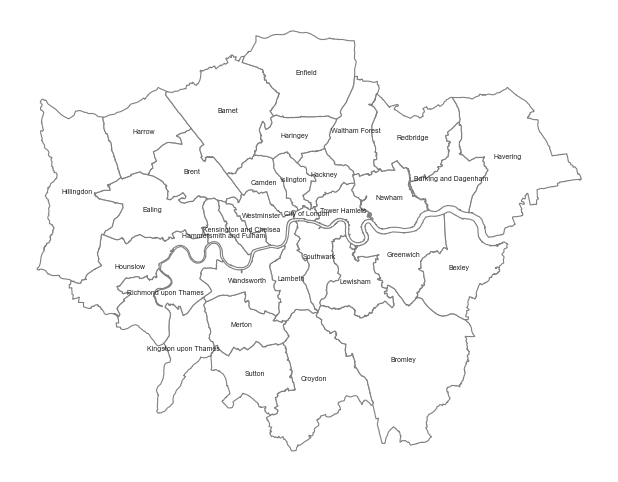

In [77]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the London borough boundaries
london_bou_bounds.plot(color='white', linewidth=0.8, edgecolor='grey', ax=ax)

# Add labels for each borough
for idx, row in london_bou_bounds.iterrows():
    # Get the centroid for each borough to place the label
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['NAME'], fontsize=5, ha='center', va='center')

# Remove the axis
ax.set_axis_off()

# Display the plot
plt.show()


In [78]:
# Create a copy of the Airbnb listings GeoDataFrame
airbnb_listing_gdf_v2 = airbnb_listing_gdf.copy()

# Convert the CRS of the London borough boundaries to EPSG:4326
london_bou_bounds.to_crs(epsg=4326, inplace=True)

# Select the relevant columns from the London borough boundaries
london_borough = london_bou_bounds[['geometry', 'NAME']]

# Perform a spatial join between Airbnb listings and the London borough boundaries
airbnb_listing_borough = gpd.sjoin(airbnb_listing_gdf_v2, london_borough, how='left')

# Display the columns of the joined GeoDataFrame
airbnb_listing_borough.columns


Index(['neighbourhood', 'availability_365', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'review_scores_rating',
       'review_scores_location', 'geometry', 'index_right', 'NAME'],
      dtype='object')

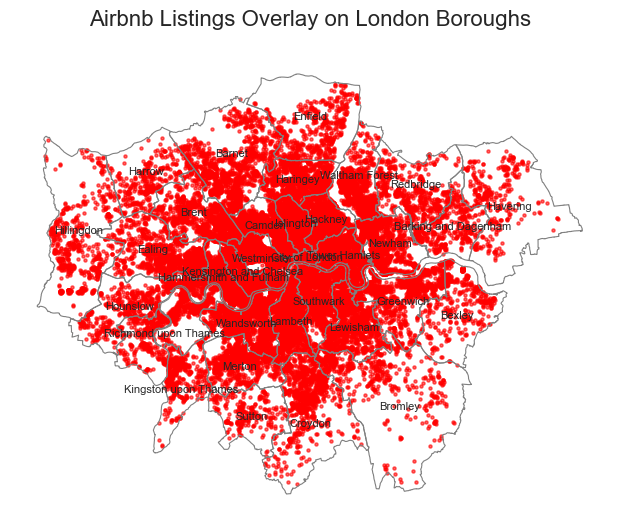

In [79]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Airbnb listings as red points
airbnb_listing_borough.plot(ax=ax, color='red', markersize=5, alpha=0.6)

# Plot the London borough boundaries on top
london_bou_bounds.plot(color='none', edgecolor='grey', linewidth=0.8, ax=ax)

# Add labels for each borough
for idx, row in london_bou_bounds.iterrows():
    # Get the centroid for each borough to place the label
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['NAME'], fontsize=8, ha='center', va='center')

# Add a title to the plot
ax.set_title('Airbnb Listings Overlay on London Boroughs', fontsize=16, pad=20)

# Remove the axis
ax.set_axis_off()

# Display the plot
plt.show()


In [80]:
# Group by 'NAME' only (removing 'neighbourhood' and 'property_type')
airbnb_grouped_v2 = airbnb_listing_borough.groupby(
    by=['NAME']
        )[['price', 'review_scores_rating', 'review_scores_location']].agg({
            'price': 'median',                      # Median for price
            'review_scores_rating': 'mean',         # Average for review_scores_rating
            'review_scores_location': 'median'      # Median for review_scores_location
        }).reset_index()

# Optionally rename columns (if needed)
airbnb_grouped_v2 = airbnb_grouped_v2.rename(columns={
    'price': 'airbnb_median_price',
    'review_scores_rating': 'airbnb_average_review_rating',
    'review_scores_location': 'airbnb_median_review_location'
})

# View the grouped DataFrame
airbnb_grouped_v2.head()

NAME  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location
0  Barking and Dagenham                 80.0                      2.987647                           4.29
1                Barnet                 99.0                      3.346583                           4.63
2                Bexley                 75.0                      2.930512                           4.38
3                 Brent                 99.0                      3.444451                           4.50
4               Bromley                 87.0                      3.471299                           4.67

In [81]:
london_borough_listing = london_borough.merge(airbnb_grouped_v2, how='left', 
                                                      on='NAME').fillna(0)
london_borough_listing.head()

geometry                  NAME  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location
0  POLYGON ((-0.33068 51.32901, -0.33059 51.32909...  Kingston upon Thames                 95.0                      3.718996                           4.79
1  POLYGON ((-0.06402 51.31864, -0.06408 51.31861...               Croydon                 74.0                      3.312126                           4.48
2  POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...               Bromley                 87.0                      3.471299                           4.67
3  POLYGON ((-0.24456 51.48870, -0.24468 51.48868...              Hounslow                 97.5                      3.471085                           4.66
4  POLYGON ((-0.41183 51.53408, -0.41188 51.53412...                Ealing                 90.5                      3.540986                           4.64

###

## Exploratory Data Analysis (SEDA)
Explore the data



### Airbnb Data

Explore the Airbnb Data Using Aggregated London Borough Data

In [82]:
london_borough_listing.head().T

0                                                  1                                                  2                                                  3                                                  4
geometry                       POLYGON ((-0.3306790218922084 51.3290110042255...  POLYGON ((-0.0640211986132677 51.3186376532417...  POLYGON ((0.0121309794638105 51.29959905294956...  POLYGON ((-0.2445623530855487 51.4887021698922...  POLYGON ((-0.4118326481684375 51.5340838562922...
NAME                                                        Kingston upon Thames                                            Croydon                                            Bromley                                           Hounslow                                             Ealing
airbnb_median_price                                                         95.0                                               74.0                                               87.0                                               97.5                                               90.5
airbnb_average_review_rating                                            3.718996                                           3.312126                                           3.471299                                           3.471085                                           3.540986
airbnb_median_review_location                                               4.79                                               4.48                                               4.67                                               4.66                                               4.64

- How does the average price of listings vary by neighborhood or neighborhood group?

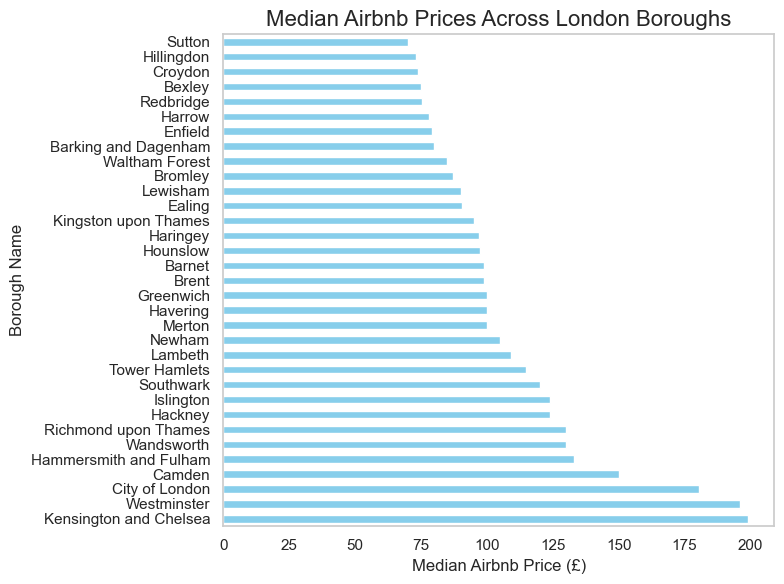

In [83]:
# Calculate the median price for each borough
median_prices_by_borough = london_borough_listing.groupby('NAME')['airbnb_median_price'].median()

# Sort the data by median price in descending order
median_prices_by_borough_sorted = median_prices_by_borough.sort_values(ascending=False)

# Create a figure and axis object
plt.figure(figsize=(8, 6))

# Plot the median prices as a horizontal bar plot
median_prices_by_borough_sorted.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Median Airbnb Price (£)', fontsize=12)
plt.ylabel('Borough Name', fontsize=12)
plt.title('Median Airbnb Prices Across London Boroughs', fontsize=16)

# Remove gridlines
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


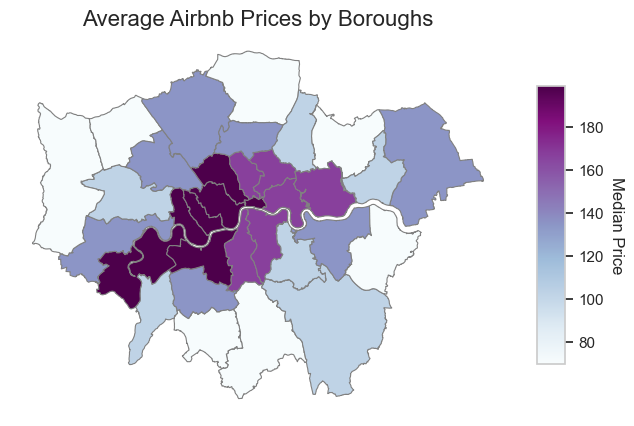

In [84]:
# Plot the average price by neighborhood
fig, ax = plt.subplots(figsize=(8, 6))
london_borough_listing.plot(column='airbnb_median_price', cmap='BuPu', scheme='Quantiles', k=5, linewidth=0.8, edgecolor='grey', ax=ax)

# Add a colorbar to indicate price ranges
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=london_borough_listing['airbnb_median_price'].min(), vmax=london_borough_listing['airbnb_median_price'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=10)  # Adjust size with shrink and aspect parameters
cbar.set_label('Median Price', rotation=270, labelpad=15)

ax.set_title('Average Airbnb Prices by Boroughs', fontsize=16)
ax.set_axis_off()

plt.show()

The top boroughs in London, ranked by their median Airbnb price per night, reveal a diverse range of property values across the city. Westminster and Kensington and Chelsea lead the list, each with a median price of £200, reflecting their status as some of the most sought-after and affluent areas in London. The City of London follows closely with a median price of £182, indicating a premium for staying in the heart of the capital’s financial district. Camden, known for its vibrant cultural scene, has a median price of £152, while Hammersmith and Fulham, with its desirable residential areas, shows a median price of £134. Richmond upon Thames and Wandsworth, offering a more suburban feel with access to green spaces, have median prices of £131 and £130, respectively. Islington and Hackney, popular for their trendy neighborhoods and lively atmosphere, have median prices of £125 and £124. Finally, Southwark, known for its historic and emerging cultural attractions, has a median price of £120. These figures highlight the varying levels of affordability and desirability in different parts of London, reflecting both their geographic and socio-economic characteristics.

- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

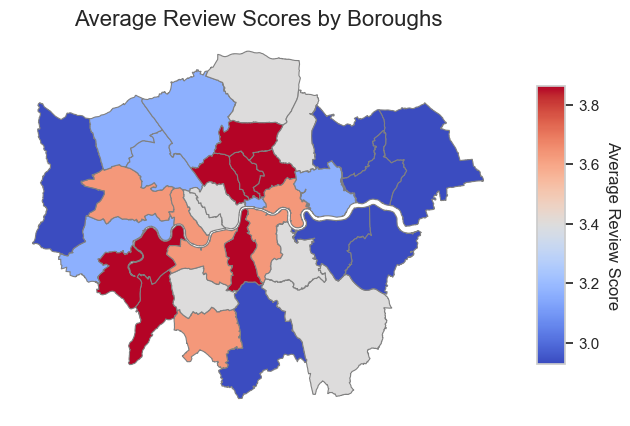

In [85]:
# Plot the average review scores by neighborhood
fig, ax = plt.subplots(figsize=(8, 6))
london_borough_listing.plot(column='airbnb_average_review_rating', cmap='coolwarm', scheme='Quantiles', k=5, linewidth=0.8, edgecolor='grey', ax=ax)

# Add a colorbar to indicate review score ranges
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=london_borough_listing['airbnb_average_review_rating'].min(), vmax=london_borough_listing['airbnb_average_review_rating'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=10)  # Adjust size with shrink and aspect parameters
cbar.set_label('Average Review Score', rotation=270, labelpad=15)

ax.set_title('Average Review Scores by Boroughs', fontsize=16)
ax.set_axis_off()

plt.show()

The locations highlighted in red represent areas with the highest average review scores from Airbnb users. These high scores are typically associated with properties that offer exceptional amenities, utilities, and overall quality, as rated by guests. In contrast, the areas marked in blue have the lowest average review scores, indicating that properties in these locations generally receive less favorable reviews. The review scores reflect guest experiences related to the house's features and the quality of the amenities provided, illustrating the varying levels of satisfaction across different boroughs. 

- How does the spatial distribution of listings with high review scores compare to those with lower scores?

- Analyze the Average location rating by visitors

To analyze this, we'll plot the distribution of listings based on their review scores, distinguishing between high and low scores.

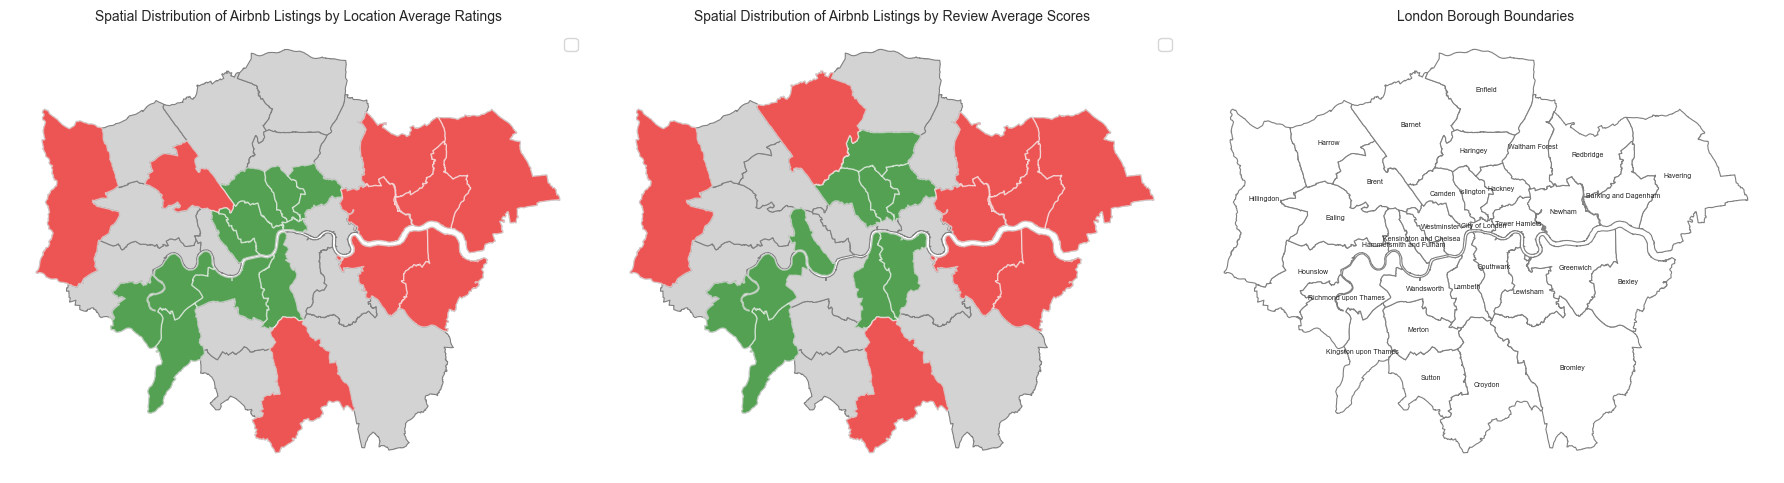

In [86]:
# Define high and low location rating thresholds
high_location_threshold = london_borough_listing['airbnb_median_review_location'].quantile(0.75)
low_location_threshold = london_borough_listing['airbnb_median_review_location'].quantile(0.25)

# Create separate GeoDataFrames for high and low location ratings
high_location_gdf = london_borough_listing[london_borough_listing['airbnb_median_review_location'] >= high_location_threshold]
low_location_gdf = london_borough_listing[london_borough_listing['airbnb_median_review_location'] <= low_location_threshold]

# Define high and low review score thresholds
high_review_threshold = london_borough_listing['airbnb_average_review_rating'].quantile(0.75)
low_review_threshold = london_borough_listing['airbnb_average_review_rating'].quantile(0.25)

# Create separate GeoDataFrames for high and low review scores
high_review_gdf = london_borough_listing[london_borough_listing['airbnb_average_review_rating'] >= high_review_threshold]
low_review_gdf = london_borough_listing[london_borough_listing['airbnb_average_review_rating'] <= low_review_threshold]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot high and low location rating distributions
london_borough_listing.plot(ax=axs[0], color='lightgrey', edgecolor='grey', linewidth=0.8, label='London Boroughs')
high_location_gdf.plot(ax=axs[0], color='green', markersize=10, alpha=0.6, label='High Location Ratings')
low_location_gdf.plot(ax=axs[0], color='red', markersize=10, alpha=0.6, label='Low Location Ratings')
axs[0].set_title('Spatial Distribution of Airbnb Listings by Location Average Ratings', fontsize=10)
axs[0].legend(loc='upper right', fontsize=12)
axs[0].set_axis_off()

# Plot high and low review score distributions
london_borough_listing.plot(ax=axs[1], color='lightgrey', edgecolor='grey', linewidth=0.8, label='London Boroughs')
high_review_gdf.plot(ax=axs[1], color='green', markersize=10, alpha=0.6, label='High Review Scores')
low_review_gdf.plot(ax=axs[1], color='red', markersize=10, alpha=0.6, label='Low Review Scores')
axs[1].set_title('Spatial Distribution of Airbnb Listings by Review Average Scores', fontsize=10)
axs[1].legend(loc='upper right', fontsize=12)
axs[1].set_axis_off()

# Plot the London borough boundaries with labels
london_bou_bounds.plot(ax=axs[2], color='white', linewidth=0.8, edgecolor='grey')
for idx, row in london_bou_bounds.iterrows():
    centroid = row['geometry'].centroid
    axs[2].text(centroid.x, centroid.y, row['NAME'], fontsize=5, ha='center', va='center')
axs[2].set_title('London Borough Boundaries', fontsize=10)
axs[2].set_axis_off()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


The first map illustrates visitor perceptions of location quality, with green areas indicating boroughs that receive very high ratings. Notable locations like Westminster, Chelsea, Camden, and Hounslow are highlighted in green, reflecting their favorable ratings in terms of location. Conversely, areas in red are marked as having low ratings, while those in grey are considered average. 

The second map shows the average review scores for properties. It reveals that homes in the low-location-rated areas often have average review scores, suggesting that while these areas may be less favored for location, the properties themselves generally receive moderate reviews. In contrast, some of the high-location-rated areas, such as Westminster and Chelsea, have average review scores, indicating that despite their prime locations, the amenities and features of the homes may not always meet high expectations. This comparison highlights a distinction between location desirability and overall property quality as perceived by guests.

Explore the Distribution of Clean Point Data Using Various Data Analysis Techniques

In [87]:
airbnb_cleaned_df.head()

neighbourhood  availability_365  latitude  longitude                property_type        room_type  accommodates  bathrooms  bedrooms  beds                                          amenities  price  review_scores_rating  review_scores_location
0            London, England, United Kingdom                81  51.52704   -0.08129           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Coffee m...  160.0                  4.96                    4.89
1  Islington, Greater London, United Kingdom               351  51.56861   -0.11270  Private room in rental unit     Private room             1        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...   65.0                  4.80                    4.70
2                     London, United Kingdom                88  51.48780   -0.16813           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Shampoo", "Wifi", "Fire extinguisher", "Lugg...  120.0                  4.80                    4.93
3           Lambeth, England, United Kingdom               268  51.46788   -0.09993  Private room in rental unit     Private room             2        1.0       1.0   1.0  ["Shampoo", "Dishwasher", "Fire extinguisher",...   65.0                  4.72                    4.34
4        Kensington, England, United Kingdom                 3  51.51735   -0.21076           Entire rental unit  Entire home/apt             2        1.0       1.0   1.0  ["Toaster", "Room-darkening shades", "Shampoo"...  100.0                  4.74                    4.87

In [88]:
airbnb_cleaned_df.describe()

availability_365      latitude     longitude  accommodates     bathrooms      bedrooms          beds         price  review_scores_rating  review_scores_location
count      57376.000000  57376.000000  57376.000000  57376.000000  57376.000000  57376.000000  57376.000000  57376.000000          57376.000000            57376.000000
mean         186.197940     51.509068     -0.129907      3.343088      1.357414      1.502370      1.813772    160.235673              3.558413                3.590248
std          117.751987      0.049722      0.105487      2.057658      0.680555      0.955458      1.374649    132.909523              2.047168                2.053539
min            0.000000     51.295937     -0.497800      1.000000      0.000000      0.000000      0.000000      0.000000              0.000000                0.000000
25%           80.000000     51.484379     -0.192591      2.000000      1.000000      1.000000      1.000000     73.000000              3.000000                3.000000
50%          179.000000     51.513080     -0.132736      3.000000      1.000000      1.000000      1.000000    124.000000              4.690000                4.730000
75%          284.000000     51.537555     -0.068754      4.000000      1.500000      2.000000      2.000000    200.000000              4.950000                4.950000
max          365.000000     51.681781      0.295731     16.000000     26.000000     24.000000     38.000000   1000.000000              5.000000                5.000000

- What is the count of the total data

In [89]:
# Get the total number of listings in the Airbnb dataset
total_listings = len(airbnb_cleaned_df)

# Print the total number of listings
print(f"Total number of Airbnb listings after cleaning: {total_listings}")


Total number of Airbnb listings after cleaning: 57376


- Distribution of Airbnb Property Types

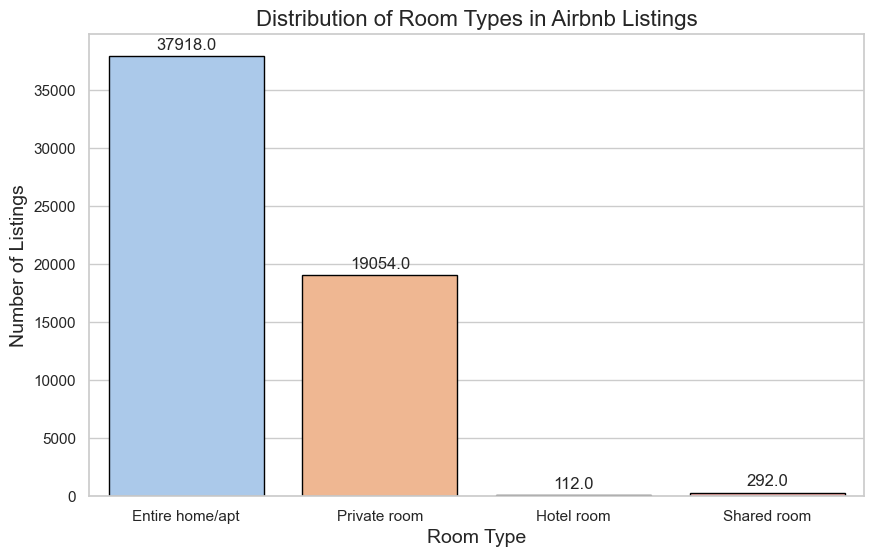

In [90]:
# Set up the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a count plot for room types
ax = sns.countplot(data=airbnb_cleaned_df, x='room_type', palette='pastel', edgecolor='black')

# Add labels and a title
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Distribution of Room Types in Airbnb Listings', fontsize=16)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)

# Display the plot
plt.show()


In [91]:
airbnb_cleaned_df.room_type.value_counts()

room_type
Entire home/apt    37918
Private room       19054
Shared room          292
Hotel room           112
Name: count, dtype: int64

In [92]:
# Calculate the percentage distribution of each room type
room_type_distribution = airbnb_cleaned_df['room_type'].value_counts(normalize=True) * 100

# Print the percentage distribution
print(room_type_distribution)

room_type
Entire home/apt    66.086866
Private room       33.209007
Shared room         0.508924
Hotel room          0.195204
Name: proportion, dtype: float64


The Airbnb data shows that the majority of listings are for "Entire home/apt" at 66.3% (38,370), followed by "Private room" at 33% (19,110). "Shared room" and "Hotel room" make up a small fraction of the listings, with 0.5% (293) and 0.2% (112) entries, respectively.

In [93]:
airbnb_cleaned_df['neighbourhood'].value_counts()

neighbourhood
0                                                27495
Greater London, England, United Kingdom          23581
London, United Kingdom                            2143
London, England, United Kingdom                   2127
London, Greater London, United Kingdom             277
                                                 ...  
London, Wembley, United Kingdom                      1
London, Dollis Hill/Willesden, United Kingdom        1
London, Greenwich, United Kingdom                    1
Bermondsey, United Kingdom                           1
Plaistow, London, England, United Kingdom            1
Name: count, Length: 647, dtype: int64

Since our data lacks complete neighborhood information, with over 27,000 entries missing neighborhood names, we will merge our data with the borough boundaries using a spatial join. This will allow us to visualize the distribution of listings across all boroughs effectively.

- Print the top 10 Property types Used to Airbnb listing in London

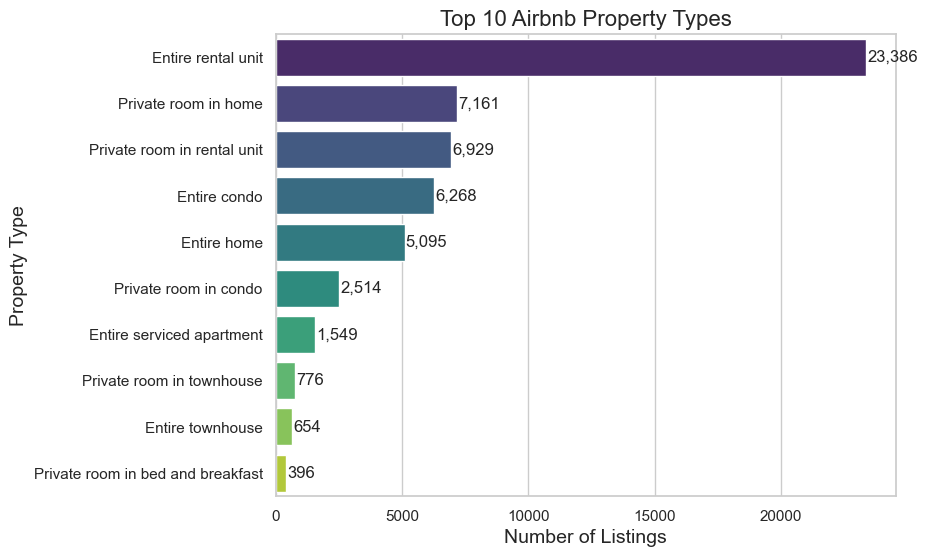

In [94]:
# Select the top 10 property types
top_10_property_types = airbnb_cleaned_df['property_type'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=top_10_property_types.values, y=top_10_property_types.index, palette="viridis")

# Add labels to each bar
for i, value in enumerate(top_10_property_types.values):
    ax.text(value + 50, i, f'{value:,}', va='center', ha='left', fontsize=12)

# Set plot title and labels
ax.set_title('Top 10 Airbnb Property Types', fontsize=16)
ax.set_xlabel('Number of Listings', fontsize=14)
ax.set_ylabel('Property Type', fontsize=14)

# Print out the plot
plt.show()

The data on Airbnb listings reveals that "Entire rental unit" is the most common property type, accounting for 40.8% (23,626 listings) of the total 57,885 listings. "Private room in home" represents 12.4% (7,165 listings), while "Private room in rental unit" accounts for 12% (6,965 listings), indicating that shared accommodations are also prevalent. "Entire condo" and "Entire home" make up 10.9% (6,295 listings) and 9% (5,205 listings) of the total, respectively. Smaller categories include "Private room in condo" at 4.3% (2,516 listings), "Entire serviced apartment" at 2.7% (1,556 listings), and "Private room in townhouse" at 1.3% (779 listings). Additionally, "Entire townhouse" and "Private room in bed and breakfast" represent 1.2% (690 listings) and 0.7% (398 listings), respectively. This distribution shows that the majority of Airbnb properties are entire units, with private rooms also constituting a significant portion of the market in London.

- Compare the availability distribution with the price using a regression plot,

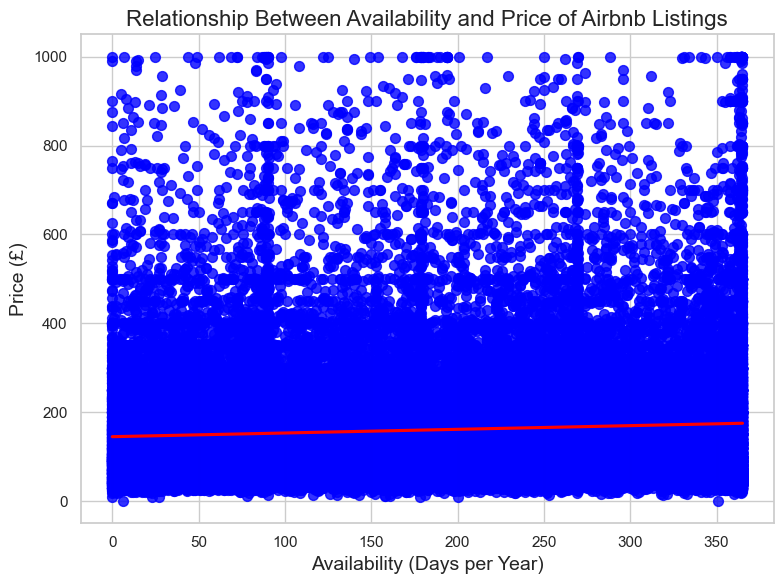

In [95]:
# Set Seaborn style for a clean, fine-tuned appearance
sns.set(style="whitegrid")

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot with a regression line
sns.regplot(x='availability_365', y='price', data=airbnb_cleaned_df, 
            scatter_kws={'s':50, 'color':'blue'}, 
            line_kws={'color':'red'}, 
            ci=None)  # ci=None to remove confidence interval shading

# Add labels and a title
plt.xlabel('Availability (Days per Year)', fontsize=14)
plt.ylabel('Price (£)', fontsize=14)
plt.title('Relationship Between Availability and Price of Airbnb Listings', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Based on the scatter plot with a regression line, we observe that there is no significant relationship between the availability of Airbnb listings and their price. The lack of a clear trend or pattern suggests that the number of days a property is available throughout the year does not have a strong influence on its pricing

- What is the distribution of price per night

Number of listings after removing outliers: 57376


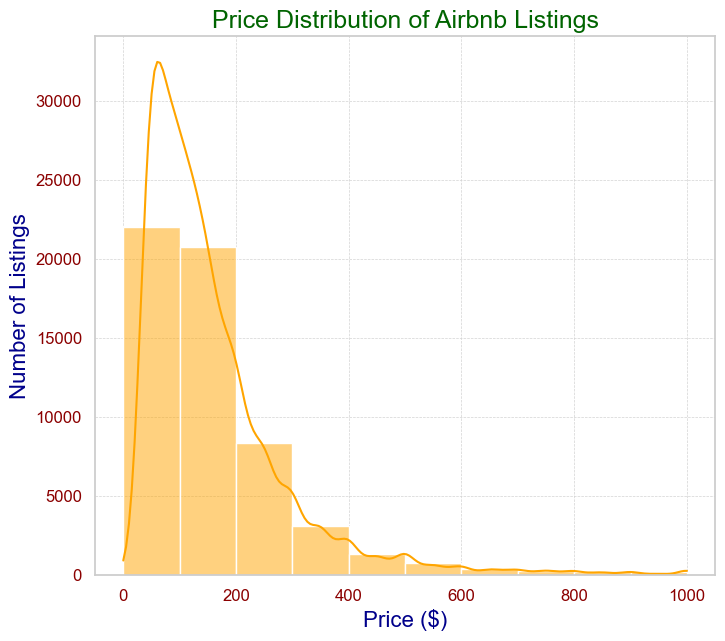

In [96]:
# Set up the figure size
plt.figure(figsize=(8, 7))

# Replot the histogram for the cleaned price data
sns.histplot(airbnb_cleaned_df['price'], bins=10, color='orange', kde=True)

# Add labels and a title
plt.xlabel('Price ($)', fontsize=16, color='darkblue')
plt.ylabel('Number of Listings', fontsize=16, color='darkblue')
plt.title('Price Distribution of Airbnb Listings', fontsize=18, color='darkgreen')

# Customize the grid and ticks for a polished look
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

# Print the number of listings after removing outliers
print(f"Number of listings after removing outliers: {len(airbnb_cleaned_df)}")

# Show the plot
plt.show()

From the chart above, it was observed that a significant portion of Airbnb listings are priced at less than $1,000 per night. This indicates that most listings fall within this lower price range.

The histogram reveals a leftward skew in the price distribution. This leftward tilt, also known as a negative skew, suggests that while the majority of listings are clustered around the lower end of the price spectrum, there are fewer listings at higher price points. In other words, the distribution has a long tail extending towards the higher price range, with most of the data concentrated on the lower end. This pattern is typical in real estate and rental markets where a larger volume of properties is priced affordably, while only a few high-end listings drive up the average price.

This leftward skew indicate that the majority of Airbnb users are likely to encounter lower-priced options, while high-priced listings are less common but potentially more expensive.

###

Capacity and Pricing Analysis
   - How does the price of listings correlate with the number of accommodations (e.g., accommodates 2 vs. 6)?
   - What is the relationship between the number of bedrooms or beds and the price of listings?

              price  bedrooms      beds  bathrooms
price      1.000000  0.522656  0.437597   0.403999
bedrooms   0.522656  1.000000  0.703750   0.583645
beds       0.437597  0.703750  1.000000   0.437321
bathrooms  0.403999  0.583645  0.437321   1.000000


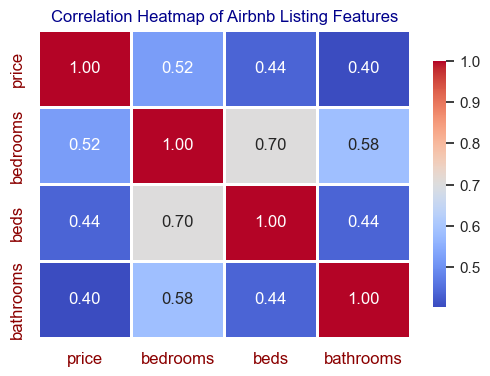

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
selected_features = airbnb_cleaned_df[['price', 'bedrooms', 'beds', 'bathrooms']]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set Seaborn style for a clean and elegant appearance
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap with annotations, a color map, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, linecolor='white', cbar_kws={'shrink': .8})

# Add a title to the heatmap
plt.title('Correlation Heatmap of Airbnb Listing Features', fontsize=12, color='darkblue')

# Adjust label sizes and colors for readability
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

# Display the heatmap
plt.show()


The correlation matrix for the Airbnb listing features reveals the following relationships among price, number of bedrooms, number of beds, and number of bathrooms:

- **Price and Bedrooms**: There is a moderate positive correlation of 0.52 between price and the number of bedrooms, indicating that listings with more bedrooms tend to have higher prices. 

- **Price and Beds**: The correlation between price and the number of beds is 0.44. This suggests a moderate positive relationship, where listings with more beds are generally associated with higher prices.

- **Price and Bathrooms**: The correlation between price and the number of bathrooms is 0.40, reflecting a moderate positive association. Listings with more bathrooms tend to be priced higher.

Overall, the matrix demonstrates that while there are positive correlations between price and features like bedrooms, beds, and bathrooms, the strength of these relationships varies. The strongest correlation is observed between the number of bedrooms and beds, highlighting a clear pattern where larger properties typically offer more amenities.

###

Amenities and Pricing
   - Which amenities are most commonly found in higher-priced listings?
   - How does the number of amenities offered impact the review scores or pricing?
   - Bathroom and Bedroom Analysis

Using the average (mean) can sometimes be misleading, especially if your data is skewed or contains outliers. In such cases, other statistical measures and visualizations can provide a more accurate and comprehensive understanding of the data distribution.

Median is the middle value of your dataset and is less affected by extreme values compared to the mean. It provides a better central tendency measure when the data is skewed.

<Figure size 1200x1000 with 0 Axes>

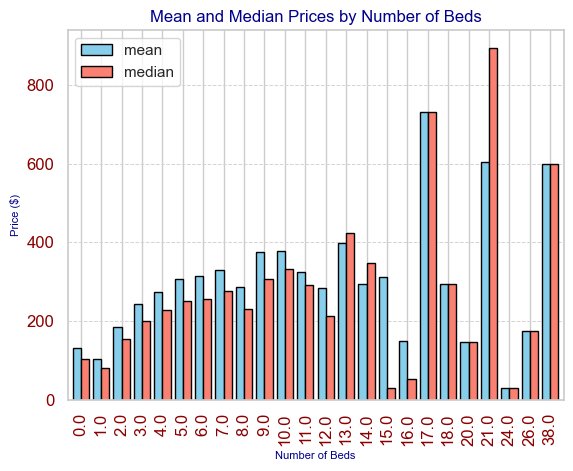

In [98]:
# Calculate mean and median prices by number of beds
mean_median_prices = selected_features.groupby('beds')['price'].agg(['mean', 'median'])

# Set Seaborn style for a clean, elegant appearance
import seaborn as sns
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12,10))

# Create a bar plot for mean and median prices
mean_median_prices.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black', width=0.8)

# Add labels and a title with enhanced styling
plt.title('Mean and Median Prices by Number of Beds', fontsize=12, color='darkblue')
plt.xlabel('Number of Beds', fontsize=8, color='darkblue')
plt.ylabel('Price ($)', fontsize=8, color='darkblue')

# Customize the x-axis and y-axis ticks
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='lightgrey')

# Display the plot
plt.show()


- Amenitties Analysis

In [99]:
# Sort the DataFrame by the 'Total' column in descending order
sorted_amenities = amenities_summary.sort_values(by='Total', ascending=False)

# Select the top 10 amenities
top_10_amenities = sorted_amenities.head(10)

# Display the top 10 amenities
print(top_10_amenities)

                    Amenity  Total
1755            Smoke alarm  52955
1315                Kitchen  52344
2212                   Wifi  51975
2632             Essentials  46028
8746              Hot water  43732
1945                   Iron  42034
686   Carbon monoxide alarm  41514
2743                Hangers  41259
8340             Hair dryer  41223
6771  Dishes and silverware  41039


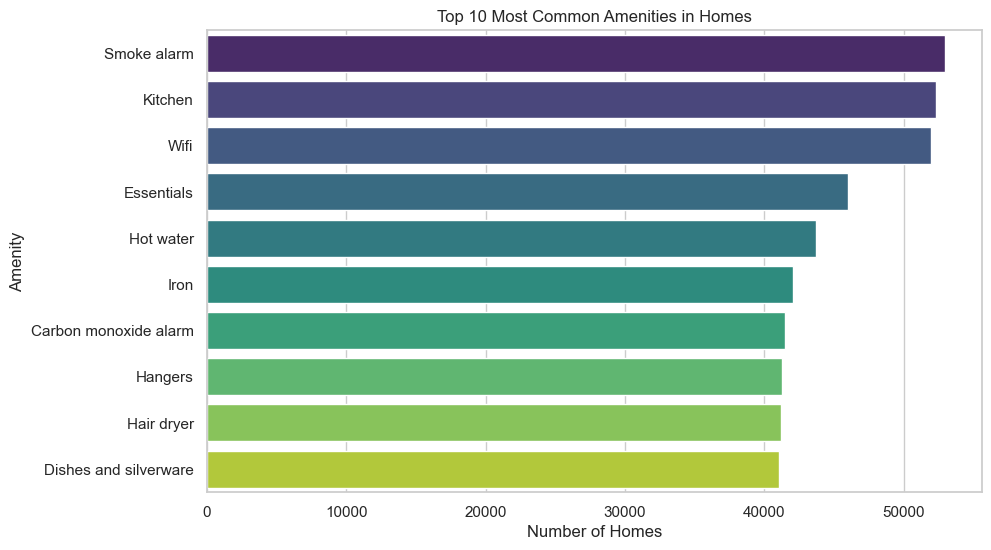

In [102]:
# Plot the top 10 amenities using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Amenity', data=top_10_amenities, palette='viridis')

# Add labels and title
plt.xlabel('Number of Homes')
plt.ylabel('Amenity')
plt.title('Top 10 Most Common Amenities in Homes')

# Show the plot
plt.show()


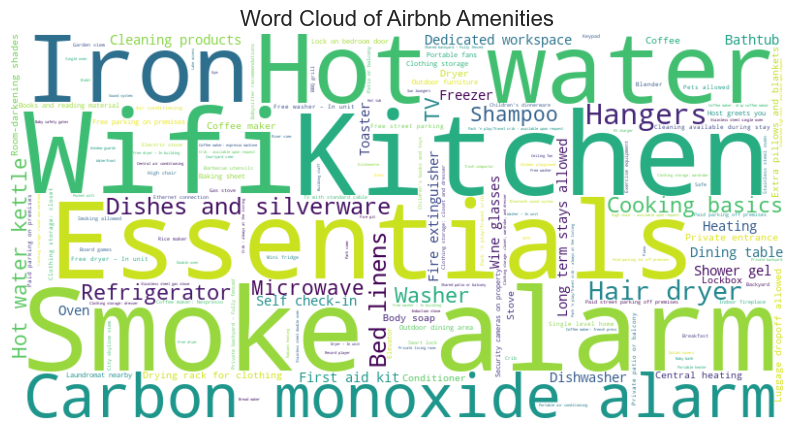

In [103]:
from wordcloud import WordCloud

# Assuming amenities_transposed is the DataFrame from the previous step
# Create a dictionary from the DataFrame for word cloud generation
amenities_dict = dict(zip(amenities_summary['Amenity'], amenities_summary['Total']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(amenities_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Airbnb Amenities', fontsize=16)
plt.show()

The plot visualizes the top 10 most common amenities found in UK homes, highlighting their prevalence across the dataset. Amenities like "Smoke alarm," "Kitchen," and "Wifi" top the list, reflecting their widespread presence in residences. The horizontal bar chart effectively compares the number of homes featuring each amenity, with "Smoke alarm" being the most common and "Dishes and silverware" rounding out the top ten. This visualization provides clear insights into the amenities most frequently available in UK homes.

###

#### Propety Price in London

In [104]:
london_property_price.head()

shape: (5, 19)
┌─────────────┬────────┬─────────────┬──────────┬───┬─────────────┬──────┬────────────┬────────────┐
│ Transaction ┆ price  ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Stat ┆ year ┆ Property_T ┆ postcode_d │
│ _unique_ide ┆ ---    ┆ nsfer       ┆ ---      ┆   ┆ us - monthl ┆ ---  ┆ ype_Full   ┆ istrict    │
│ ntifier     ┆ i64    ┆ ---         ┆ str      ┆   ┆ y_file_o…   ┆ i32  ┆ ---        ┆ ---        │
│ ---         ┆        ┆ datetime[μs ┆          ┆   ┆ ---         ┆      ┆ str        ┆ str        │
│ str         ┆        ┆ ]           ┆          ┆   ┆ str         ┆      ┆            ┆            │
╞═════════════╪════════╪═════════════╪══════════╪═══╪═════════════╪══════╪════════════╪════════════╡
│ {BADC1CBC-8 ┆ 620000 ┆ 2013-02-14  ┆ W9 1BE   ┆ … ┆ A           ┆ 2013 ┆ Flats/Mais ┆ W9         │
│ C1C-4AD8-AA ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ onettes    ┆            │
│ F4-AB0A6…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {2EDACF61-2 ┆ 225000 ┆ 2013-12-17  ┆ SW15 3HJ ┆ … ┆ A           ┆ 2013 ┆ Flats/Mais ┆ SW15       │
│ CD7-4BB7-98 ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ onettes    ┆            │
│ 63-AB0A6…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {224F0E05-9 ┆ 200000 ┆ 2013-08-20  ┆ NW10 5NL ┆ … ┆ A           ┆ 2013 ┆ Flats/Mais ┆ NW10       │
│ 469-4179-87 ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ onettes    ┆            │
│ 2C-AE9F3…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {97AB81E1-3 ┆ 560000 ┆ 2013-12-20  ┆ NW4 2JY  ┆ … ┆ A           ┆ 2013 ┆ Semi-Detac ┆ NW4        │
│ 562-4241-BE ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ hed        ┆            │
│ 63-A788B…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {99956AA8-3 ┆ 440000 ┆ 2013-07-19  ┆ SW2 2DJ  ┆ … ┆ A           ┆ 2013 ┆ Terraced   ┆ SW2        │
│ A7F-4C69-B2 ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆            ┆            │
│ 2B-B5B2F…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
└─────────────┴────────┴─────────────┴──────────┴───┴─────────────┴──────┴────────────┴────────────┘

**Property Type Insights:**
   - What is the distribution of property types (e.g., entire home, private room) across different neighborhoods?
   - How does the average price differ between various property types?

A total of 708,864 properties were sold in London from 2012 up to April 2023, which is the most recent update of the data.

In [105]:
london_property_price.head()

shape: (5, 19)
┌─────────────┬────────┬─────────────┬──────────┬───┬─────────────┬──────┬────────────┬────────────┐
│ Transaction ┆ price  ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Stat ┆ year ┆ Property_T ┆ postcode_d │
│ _unique_ide ┆ ---    ┆ nsfer       ┆ ---      ┆   ┆ us - monthl ┆ ---  ┆ ype_Full   ┆ istrict    │
│ ntifier     ┆ i64    ┆ ---         ┆ str      ┆   ┆ y_file_o…   ┆ i32  ┆ ---        ┆ ---        │
│ ---         ┆        ┆ datetime[μs ┆          ┆   ┆ ---         ┆      ┆ str        ┆ str        │
│ str         ┆        ┆ ]           ┆          ┆   ┆ str         ┆      ┆            ┆            │
╞═════════════╪════════╪═════════════╪══════════╪═══╪═════════════╪══════╪════════════╪════════════╡
│ {BADC1CBC-8 ┆ 620000 ┆ 2013-02-14  ┆ W9 1BE   ┆ … ┆ A           ┆ 2013 ┆ Flats/Mais ┆ W9         │
│ C1C-4AD8-AA ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ onettes    ┆            │
│ F4-AB0A6…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {2EDACF61-2 ┆ 225000 ┆ 2013-12-17  ┆ SW15 3HJ ┆ … ┆ A           ┆ 2013 ┆ Flats/Mais ┆ SW15       │
│ CD7-4BB7-98 ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ onettes    ┆            │
│ 63-AB0A6…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {224F0E05-9 ┆ 200000 ┆ 2013-08-20  ┆ NW10 5NL ┆ … ┆ A           ┆ 2013 ┆ Flats/Mais ┆ NW10       │
│ 469-4179-87 ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ onettes    ┆            │
│ 2C-AE9F3…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {97AB81E1-3 ┆ 560000 ┆ 2013-12-20  ┆ NW4 2JY  ┆ … ┆ A           ┆ 2013 ┆ Semi-Detac ┆ NW4        │
│ 562-4241-BE ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆ hed        ┆            │
│ 63-A788B…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
│ {99956AA8-3 ┆ 440000 ┆ 2013-07-19  ┆ SW2 2DJ  ┆ … ┆ A           ┆ 2013 ┆ Terraced   ┆ SW2        │
│ A7F-4C69-B2 ┆        ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆            ┆            │
│ 2B-B5B2F…   ┆        ┆             ┆          ┆   ┆             ┆      ┆            ┆            │
└─────────────┴────────┴─────────────┴──────────┴───┴─────────────┴──────┴────────────┴────────────┘

Trend Analysis
-  Analyze how property prices change over time and visualize this trend by property type.

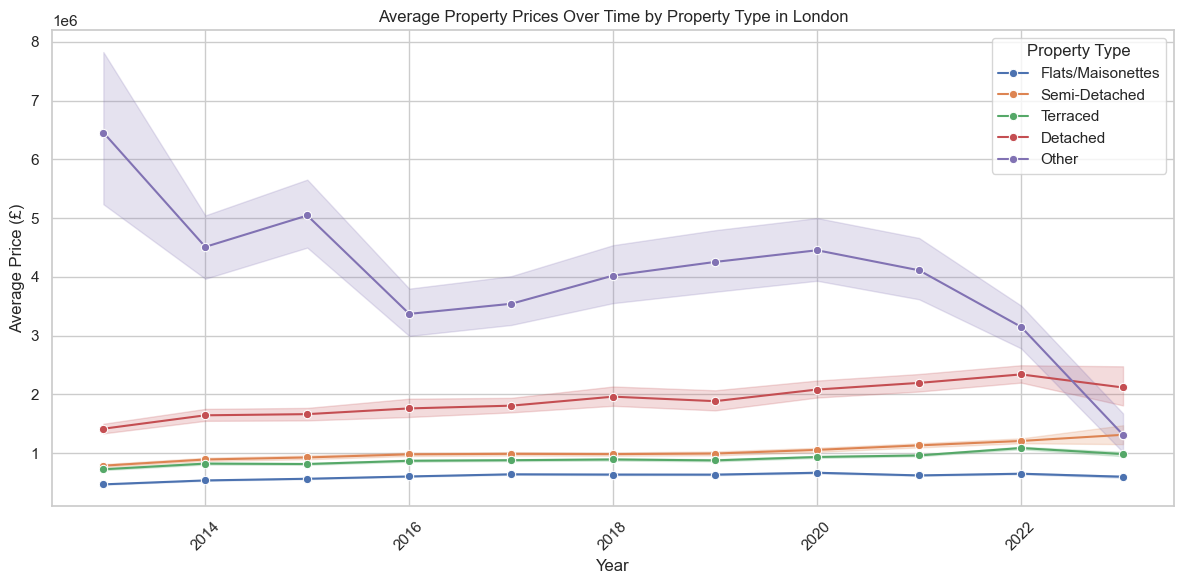

In [106]:
london_property_df = london_property_price.to_pandas()

plt.figure(figsize=(12, 6))
sns.lineplot(data=london_property_df, x='year', y='price', hue='Property_Type_Full', marker='o')
plt.title('Average Property Prices Over Time by Property Type in London')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

This chart illustrates the trends in house prices in London over the past decade. It reveals that while detached houses have experienced a general upward trend, their prices tend to dip at times. In contrast, other house types have shown minimal increases in average prices but have generally followed a downward trend in their median prices. However, these trends may not fully reflect the underlying market dynamics. Factors such as property degradation or renovations could skew the data, leading to less reliable conclusions about price trends for different house types.

###

Price Distribution by Property Type
-  Explore the distribution of property prices across different property types to understand variations and outliers.

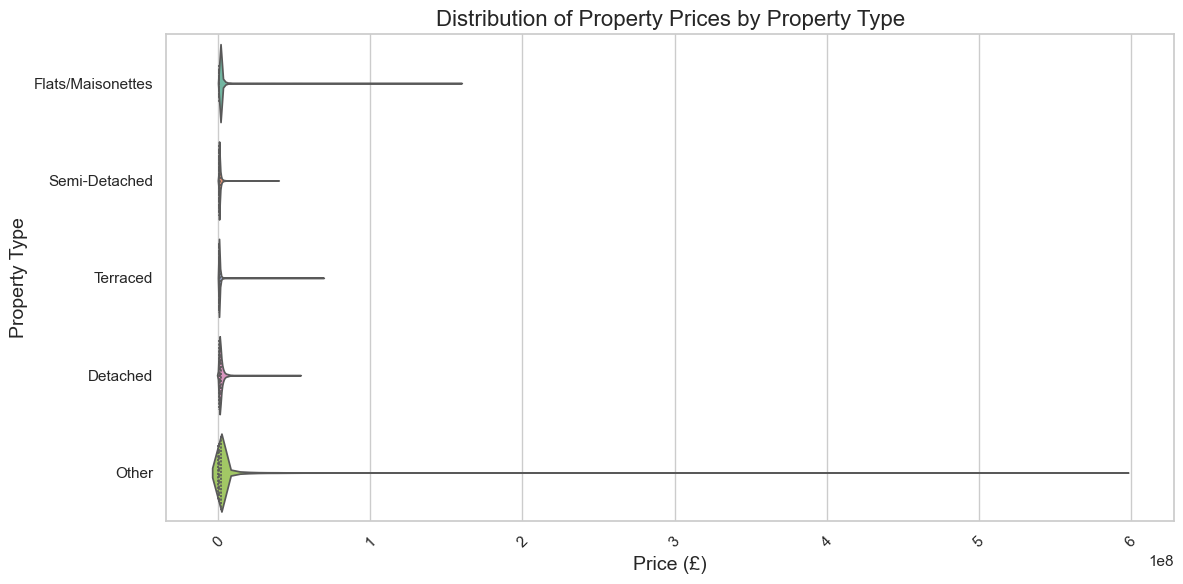

In [107]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a violin plot with horizontal orientation
sns.violinplot(data=london_property_df, x='price', y='Property_Type_Full', palette='Set2', inner='quartile')

# Add title and labels
plt.title('Distribution of Property Prices by Property Type', fontsize=16)
plt.xlabel('Price (£)', fontsize=14)
plt.ylabel('Property Type', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

###

## Spatial Analysis


 **Map the Spatial Distribution of Airbnb Listings:**
- Use Kernel Density Estimation (KDE) to identify areas of high Airbnb concentration.

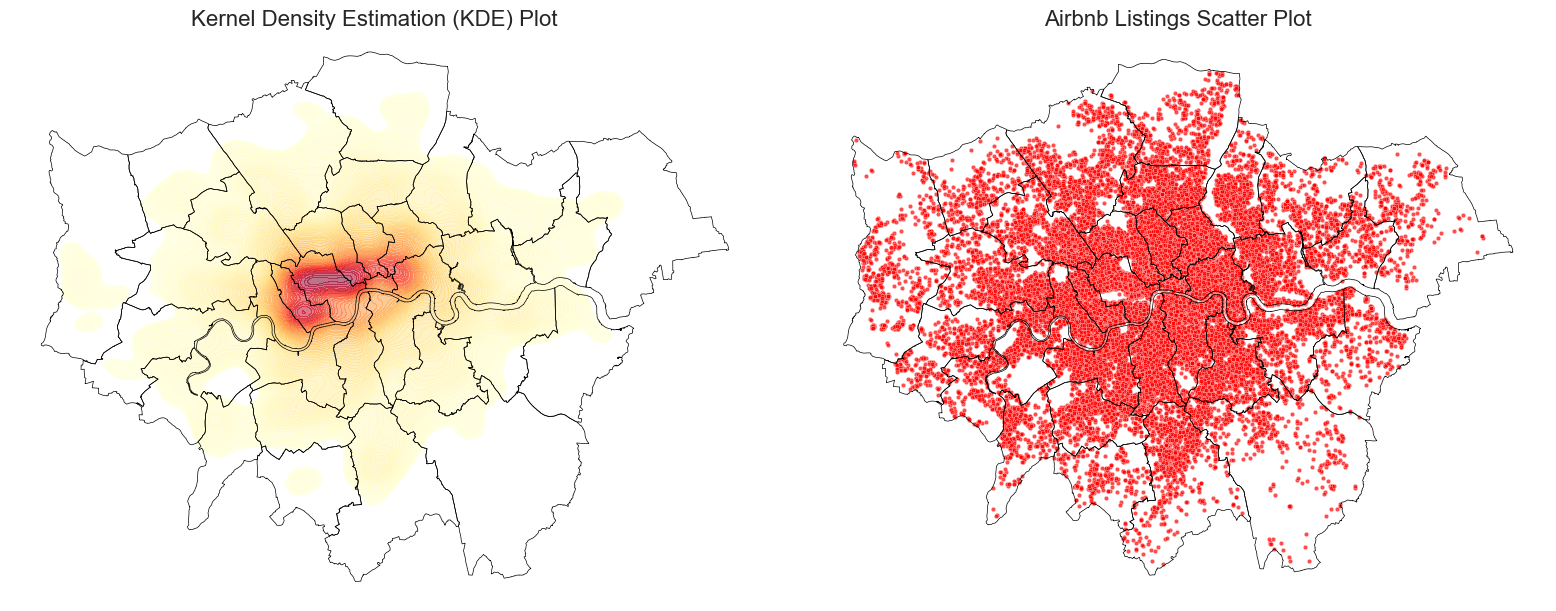

In [108]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Generate and add the KDE plot to the first axis
sns.kdeplot(
    data=airbnb_cleaned_df,
    x="longitude",
    y="latitude",
    n_levels=75,
    shade=True,
    fill=True,
    levels=90,
    alpha=0.55,
    linewidths=1.5,
    cmap="YlOrRd",
    ax=axs[0]
)
# Plot London borough boundaries on KDE plot
london_bou_bounds.plot(ax=axs[0], edgecolor='black', linewidth=0.5, facecolor='none')

axs[0].set_title("Kernel Density Estimation (KDE) Plot", fontsize=16)
axs[0].set_xlabel("Longitude", fontsize=12)
axs[0].set_ylabel("Latitude", fontsize=12)
axs[0].set_axis_off()

# Generate and add the scatter plot to the second axis
sns.scatterplot(
    data=airbnb_cleaned_df,
    x="longitude",
    y="latitude",
    alpha=0.7,
    color='red',  
    s=10,  
    ax=axs[1]
)
# Plot London borough boundaries on scatter plot
london_bou_bounds.plot(ax=axs[1], edgecolor='black', linewidth=0.5, facecolor='none')

axs[1].set_title("Airbnb Listings Scatter Plot", fontsize=16)
axs[1].set_xlabel("Longitude", fontsize=12)
axs[1].set_ylabel("Latitude", fontsize=12)
axs[1].set_axis_off() 

# Display the plots
plt.show()


From the kernel density map, it's evident that there is a significant cluster of Airbnb listings in the center of London, indicating that the highest concentration of listings is in this area of the city.

**Identify Clusters and Spatial Patterns:**
- Measure spatial autocorrelation (Moran's I) to determine the degree of spatial dependency among Airbnb listings.

Moran's I: 1.00
p-value: 0.001


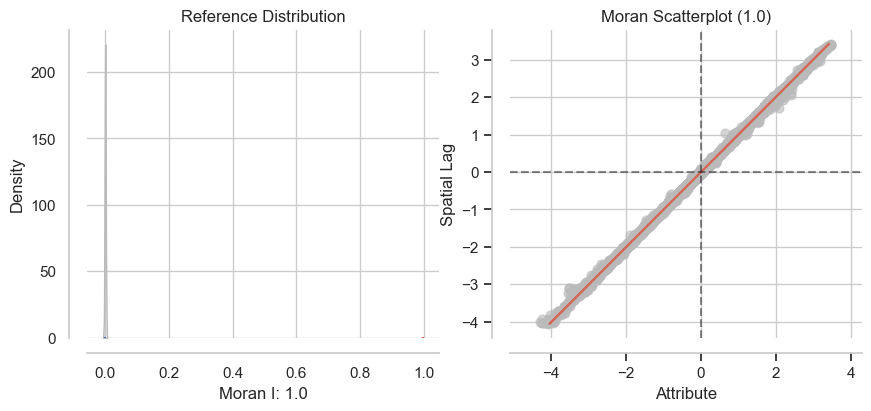

In [109]:
# Create a spatial weights matrix based on the data's spatial coordinates
w = lib.weights.distance.KNN.from_dataframe(airbnb_listing_gdf, k=10)

# Calculate Moran's I for the spatial coordinates
moran = esda.Moran(airbnb_cleaned_df['latitude'],w)

# Print the Moran's I statistic and p-value
print(f"Moran's I: {moran.I:.2f}")
print(f"p-value: {moran.p_sim:.3f}")

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

Moran's I is a measure of spatial autocorrelation, indicating whether similar values (in this case, the number of Airbnb listings) are clustered together in space. A Moran's I value of 1.00 suggests perfect positive spatial autocorrelation, meaning that areas with high numbers of Airbnb listings are surrounded by other areas with similarly high numbers, and vice versa.

The p-value of 0.001 indicates that this clustering pattern is statistically significant, meaning it's highly unlikely to have occurred by chance. Therefore, the Airbnb listings in London are strongly clustered, particularly in certain areas like the center of the city, as evidenced by both the kernel density map and the Moran's I result.

- Spatial Autocorrelation (Spatail similarity)

When visually inspecting the map of prices, we can identify potential spatial structures. If prices were randomly distributed, we wouldn't see any clustering, but the map reveals darker clusters (higher prices) in the southwest and center, with lighter hues (lower prices) in the north-central and southeast. While our brains are adept at recognizing patterns, they can sometimes perceive patterns where none exist, especially with irregularly shaped polygons. Spatial autocorrelation measures this relationship by combining spatial and attribute similarities into a summary metric, ensuring that detected patterns are statistically significant.

In [110]:
london_postal_district.columns

Index(['index', 'DistID', 'postcode_district', 'PostArea', 'Sprawl',
       'geometry', 'median_price', 'Detached', 'Flats/Maisonettes', 'Other',
       'Semi-Detached', 'Terraced', 'airbnb_median_price',
       'airbnb_average_review_rating', 'airbnb_median_review_location',
       'rent_perWeek', 'rent_perMonth', 'avg_unemployment_rate',
       'avg_income(£)', 'total_population_density'],
      dtype='object')

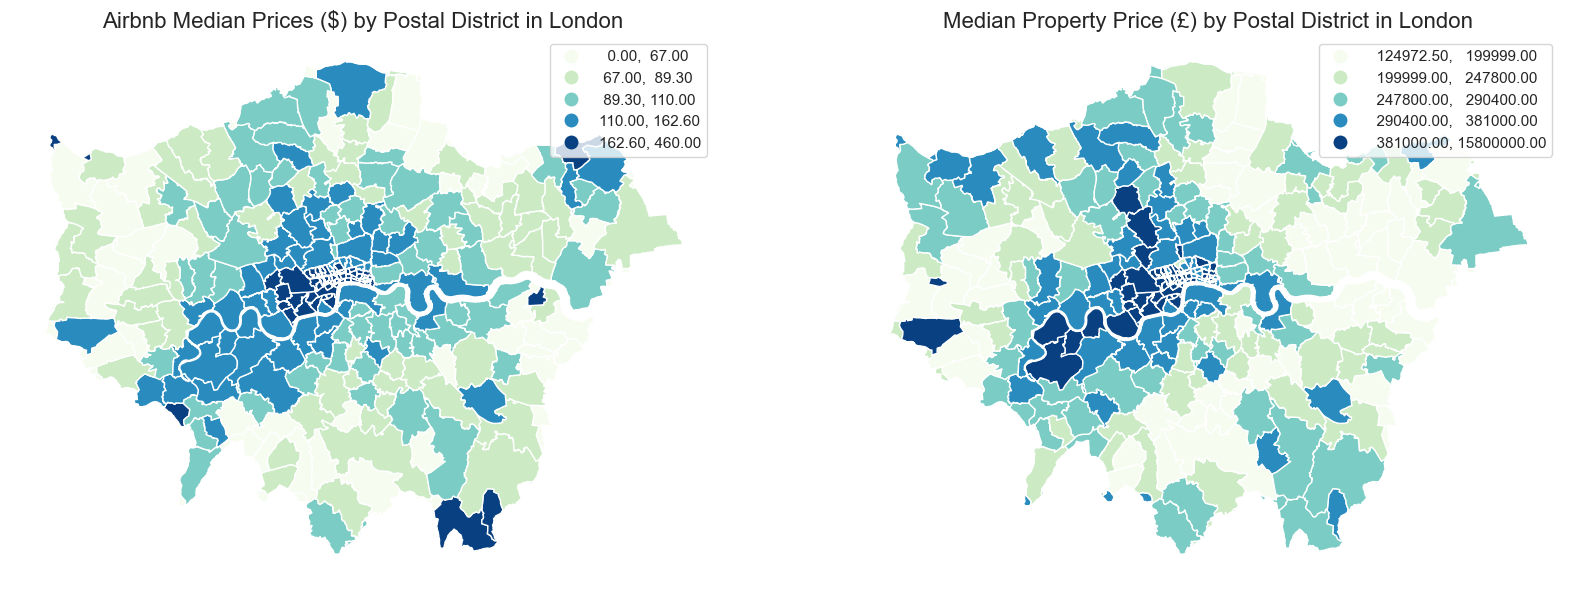

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'aspect': 'equal'})

# Fill missing values in the relevant columns with the mean value
london_postal_district['airbnb_median_price'].fillna(
    london_postal_district['airbnb_median_price'].mean(), inplace=True)

london_postal_district['median_price'].fillna(
    london_postal_district['median_price'].mean(), inplace=True)

# Plot the Airbnb median price map
london_postal_district.plot(column='airbnb_median_price',
                            scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax[0])

# Add a title to the first plot
ax[0].set_title('Airbnb Median Prices ($) by Postal District in London', fontsize=16)

# Plot the overall median price map
london_postal_district.plot(column='median_price',
                            scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax[1])

# Add a title to the second plot
ax[1].set_title('Median Property Price (£) by Postal District in London', fontsize=16)

# Remove the axes and grids
ax[0].axis('off')
ax[1].axis('off')

# Display the plots
plt.show()


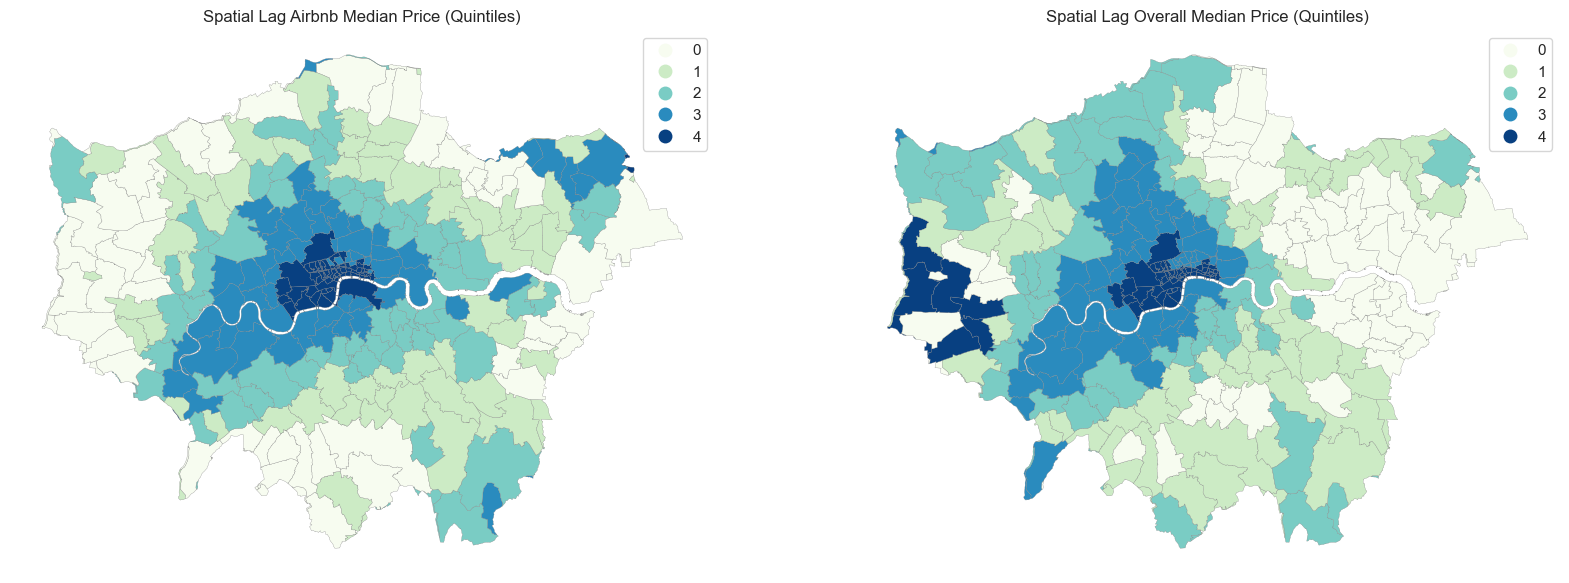

In [112]:
# Create a Queen contiguity weights matrix from the GeoDataFrame
wq = lib.weights.Queen.from_dataframe(london_postal_district)
wq.transform = 'r'

# Calculate the spatial lag of the Airbnb median prices
ylag_airbnb = lib.weights.spatial_lag.lag_spatial(wq, london_postal_district['airbnb_median_price'])

# Classify the spatial lag values of Airbnb prices into quintiles
ylag_airbnb_q5 = mc.Quantiles(ylag_airbnb, k=5)

# Calculate the spatial lag of the overall median prices
ylag_overall = lib.weights.spatial_lag.lag_spatial(wq, london_postal_district['median_price'])

# Classify the spatial lag values of overall prices into quintiles
ylag_overall_q5 = mc.Quantiles(ylag_overall, k=5)

# Plot the spatial lag maps side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'aspect': 'equal'})

# Plot the spatial lag of Airbnb median prices
london_postal_district.assign(cl=ylag_airbnb_q5.yb).plot(column='cl', categorical=True,
                                                       k=5, cmap='GnBu', linewidth=0.2, ax=ax[0],
                                                       edgecolor='grey', legend=True)
ax[0].set_title("Spatial Lag Airbnb Median Price (Quintiles)")
ax[0].set_axis_off()

# Plot the spatial lag of overall median prices
london_postal_district.assign(cl=ylag_overall_q5.yb).plot(column='cl', categorical=True,
                                                         k=5, cmap='GnBu', linewidth=0.2, ax=ax[1],
                                                         edgecolor='grey', legend=True)
ax[1].set_title("Spatial Lag Overall Median Price (Quintiles)")
ax[1].set_axis_off()

# Display the plots
plt.show()


The map above illustrates the spatial relationship between median Airbnb prices and median property prices. It reveals a notable similarity between the two maps: areas with high median Airbnb prices closely align with locations exhibiting high property prices. The clustering observed in both maps is consistent, indicating that neighborhoods with elevated Airbnb rates also experience elevated property prices.

However, some outliers are evident: buildings with lower Airbnb prices are situated at the western edge of the area, despite having higher property sales values. This suggests that while there is a strong correlation between Airbnb prices and property prices in most areas, there are exceptions. Overall, the similarity between the two pricing metrics suggests a significant relationship, indicating that both Airbnb and property prices are influential in shaping real estate trends in London.

###

## Regression and Impact Analysis

Regression analysis is a powerful tool for understanding the relationship between variables. When applied to the context of Airbnb listings and housing prices, it can help quantify how the presence and density of these listings influence property values.


Correlation analysis is a statistical method used to measure the strength and direction of the relationship between two variables. In the context of Airbnb listings and housing prices, correlation can help us understand if there's a positive or negative association between the two.   

Ordinary Least Squares (OLS) regression is a common starting point, providing a basic understanding of this relationship by minimizing the differences between observed and predicted values.

However, the spatial nature of housing data requires special considerations. Spatial dependencies, where the value of a property is influenced by nearby properties, can distort the results obtained from OLS. To further refine our understanding, Geographically Weighted Regression (GWR) can be employed. GWR allows the relationship between Airbnb listings and housing prices to vary across different locations, capturing local variations that might not be apparent using a single model. Before applying GWR, it's essential to establish a baseline understanding using OLS.



In [113]:
london_postal_district.head()


index  DistID postcode_district PostArea       Sprawl                                           geometry  median_price  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location  rent_perWeek  rent_perMonth  avg_unemployment_rate  avg_income(£)  total_population_density
0      0    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...      285000.0  450000.0           192500.0  657500.0       300000.0  263000.0                  0.0                      0.000000                            0.0           0.0            0.0              56.478791       101800.0                   11363.0
1      1     436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...      287000.0  452000.0           175000.0  350000.0       288000.0  233875.0                 90.0                      3.807742                            4.8           0.0            0.0              51.990050       101800.0                    6062.0
2      2    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...      299950.0  600000.0           199000.0  530000.0       275000.0  230000.0                  0.0                      0.000000                            0.0           0.0            0.0              55.202629       101800.0                   27385.0
3      3    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...      305000.0  470000.0           215000.0  394000.0       300000.0  249950.0                  0.0                      0.000000                            0.0           0.0            0.0                    NaN       101800.0                       0.0
4      4    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...      278475.0  490000.0           195000.0  390000.0       328750.0  236000.0                  0.0                      0.000000                            0.0           0.0            0.0              57.694704       101800.0                    5801.0

                               median_price  Detached  Flats_Maisonettes     Other  Semi_Detached  Terraced  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location  rent_perWeek  rent_perMonth  avg_unemployment_rate  avg_income  total_population_density
median_price                       1.000000  0.006606           0.105637  0.821065       0.061379  0.105405             0.115509                     -0.092061                      -0.105114     -0.076239      -0.076232               0.054723   -0.048507                 -0.014743
Detached                           0.006606  1.000000           0.192368  0.073447       0.155346  0.226377             0.260948                      0.034840                       0.044247      0.060334       0.060373              -0.009344   -0.028460                 -0.076102
Flats_Maisonettes                  0.105637  0.192368           1.000000  0.256990       0.194577  0.549223             0.631915                      0.144051  

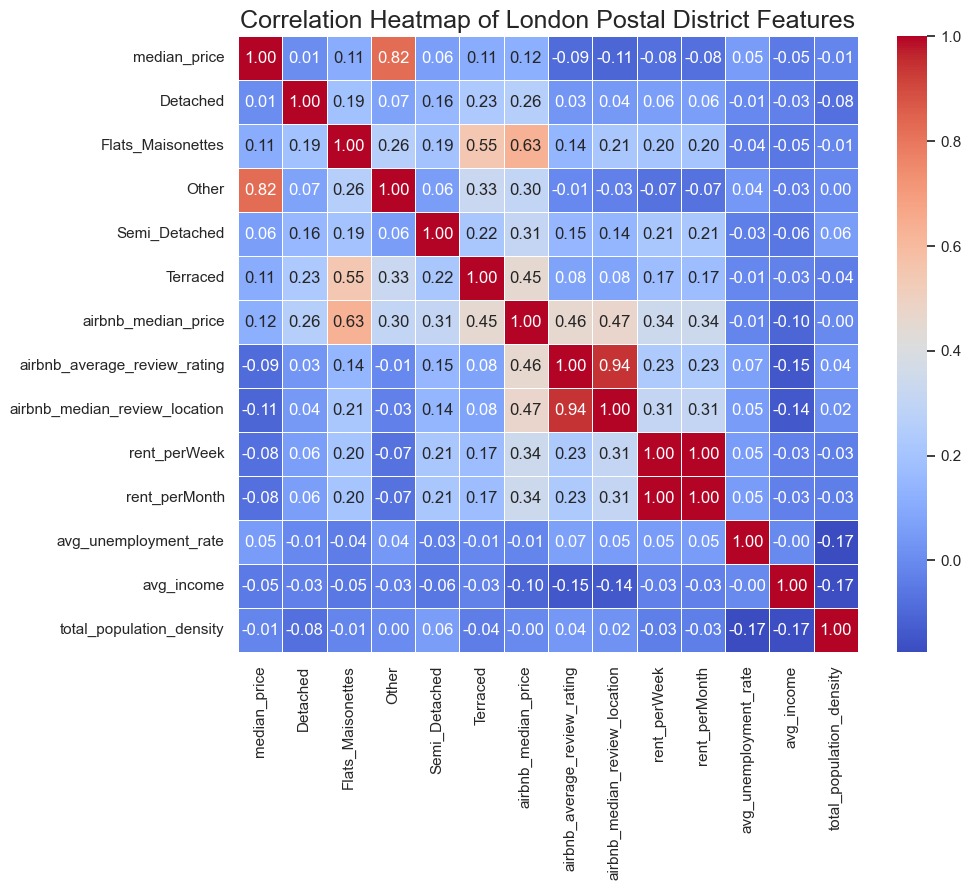

In [114]:
# Copy and clean up the London postal district DataFrame
london_postaldistrict = london_postal_district.copy()
london_postaldistrict.drop(labels=['index', 'DistID', 'postcode_district', 'PostArea', 'Sprawl', 'geometry'], axis=1, inplace=True)
london_postaldistrict.rename({'avg_income(£)': 'avg_income',
                              'Flats/Maisonettes': 'Flats_Maisonettes',
                              'Semi-Detached': 'Semi_Detached'}, axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = london_postaldistrict.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set Seaborn style for a clean appearance without grid lines
sns.set(style="white")

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations, a color map, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')

# Add a title to the heatmap
plt.title('Correlation Heatmap of London Postal District Features', fontsize=18)

# Display the heatmap
plt.show()


- Measure the depencies and effect using OLS
To measure dependencies and effects using Ordinary Least Squares (OLS) regression, you need to evaluate how various independent variables (such as Airbnb listings) impact a dependent variable (such as housing prices) while accounting for potential spatial dependencies in the data. Although OLS does not explicitly handle spatial dependencies, it provides a starting point for understanding the basic relationships before incorporating more advanced spatial techniques.

In [115]:
import statsmodels.formula.api as smf

# Define the dependent variable that needs to be predicted (labels)
y = london_postaldistrict["median_price"].values

# Define the independent variables. Let's also drop geometry and label
x = london_postaldistrict.drop(labels=["median_price"], axis=1)
features_list = list(x.columns)  # List features so we can rank their importance later

# Fit the model
model = smf.ols(formula="median_price ~ " + " + ".join(features_list), data=london_postaldistrict)
results = model.fit()

# Model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           median_price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     55.34
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.16e-68
Time:                        19:06:02   Log-Likelihood:                -4274.8
No. Observations:                 287   AIC:                             8578.
Df Residuals:                     273   BIC:                             8629.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Here's the interpretation of the OLS regression results in paragraph format with numbers formatted in markdown:

---

The regression analysis provides insights into the factors influencing median house prices. The model has an **R-squared** value of **0.725**, indicating that approximately **72.5%** of the variance in median house prices is explained by the predictors included in the model. The **Adjusted R-squared** of **0.712** adjusts this value for the number of predictors, suggesting that the model is a good fit for the data. The overall significance of the model is confirmed by the **F-statistic** of **55.32** with a p-value of **1.21e-68**, indicating that the model is statistically significant and that at least some predictors are relevant.

Examining the coefficients of individual predictors, the **Intercept** is **493,400**, representing the baseline median price when all other variables are zero. However, this coefficient is not statistically significant, with a p-value of **0.326**. 

The variable for **Detached** houses has a coefficient of **-0.0114**, suggesting a minimal and statistically insignificant effect on median price (p-value = **0.672**). Similarly, **Flats_Maisonettes** show a coefficient of **0.1860**, which also has a positive but statistically insignificant effect on median price (p-value = **0.566**). In contrast, houses classified as **Other** have a significant positive effect with a coefficient of **0.7067** and a p-value less than **0.001**, indicating that these houses tend to have higher median prices.

**Semi_Detached** houses have a coefficient of **0.1647**, reflecting a significant positive effect on median price (p-value = **0.017**). On the other hand, **Terraced** houses exhibit a significant negative effect with a coefficient of **-0.2733** and a p-value less than **0.001**, suggesting that these houses are associated with lower median prices.

Regarding Airbnb-related variables, the **airbnb_median_price** shows a significant Postive effect with a coefficient of **+2,126.55** and a p-value of **0.026**, indicating that higher Airbnb median prices are associated with Higher median house prices. Conversely, the **airbnb_average_review_rating** and **airbnb_median_review_location** have coefficients of **-77,250** and **-489.68**, respectively, but neither of these effects is statistically significant, with p-values of **0.524** and **0.996**.

Finally, the variables for **rent_perWeek** and **rent_perMonth** have coefficients of **44,690** and **-10,280**, respectively, but both are statistically insignificant (p-values of **0.863** and **0.864**), suggesting they do not significantly influence median house prices.

In summary, the analysis highlights that the type of house and the median Airbnb price are significant predictors of median house prices, while other variables, including Airbnb ratings and rental prices, do not have a significant impact.

---

###

Comprehensive Analysis of the Relationship Between Airbnb Listing Prices and Average Property Prices

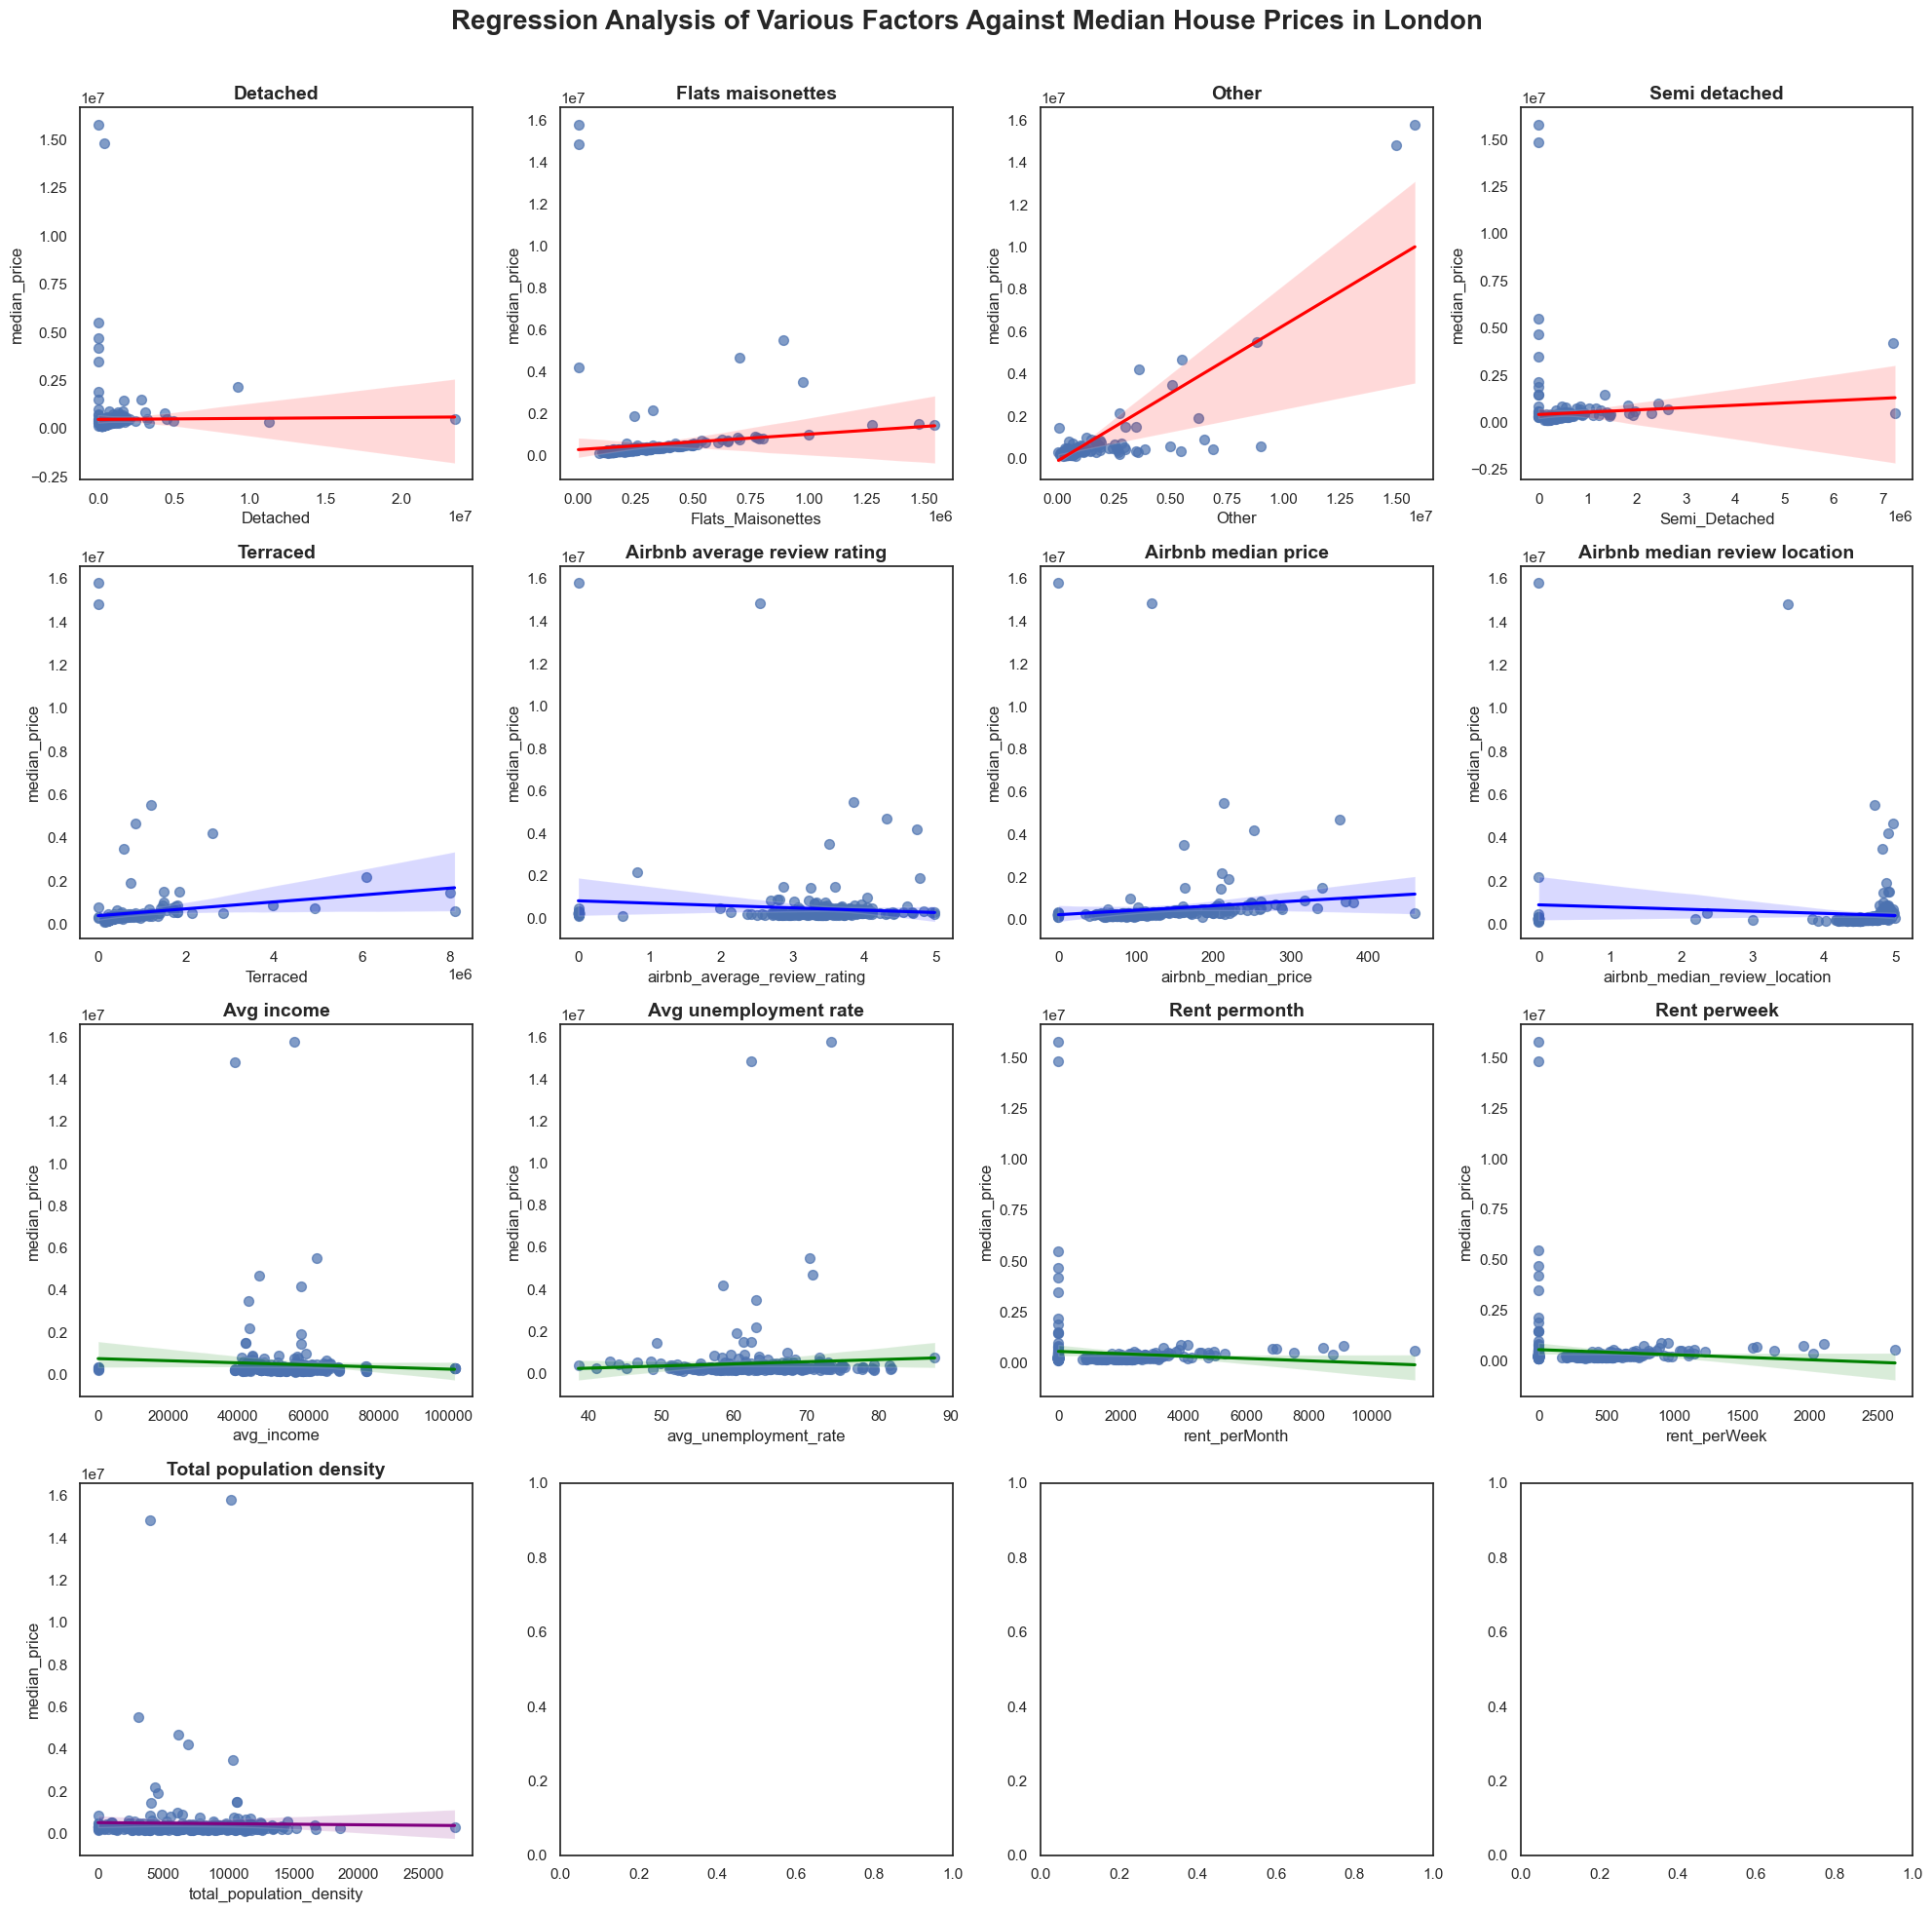

In [118]:
# Define other_columns with the relevant columns from your DataFrame
other_columns = london_postaldistrict.columns.difference(['median_price']).tolist()

# Now, proceed with the rest of your code
quarter = len(other_columns) // 3
columns_row1 = other_columns[:quarter]
columns_row2 = other_columns[quarter:quarter*2]
columns_row3 = other_columns[quarter*2:quarter*3]
columns_row4 = other_columns[quarter*3:]

# Determine the maximum number of columns in any row
max_columns = max(len(columns_row1), len(columns_row2), len(columns_row3), len(columns_row4))

# Set the figure size and create subplots, ensuring the grid matches the number of columns
fig, axs = plt.subplots(4, max_columns, figsize=(20, 20))  # Adjusted figure size

# Create the first row of pairplots with regression lines and different colors
for i, col in enumerate(columns_row1):
    sns.regplot(x=london_postaldistrict[col], y=london_postaldistrict['median_price'], 
                ax=axs[0, i], scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
    axs[0, i].set_title(col.replace('_', ' ').capitalize(), fontsize=14, fontweight='bold')

# Create the second row of pairplots with regression lines and different colors
for i, col in enumerate(columns_row2):
    sns.regplot(x=london_postaldistrict[col], y=london_postaldistrict['median_price'], 
                ax=axs[1, i], scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'blue'})
    axs[1, i].set_title(col.replace('_', ' ').capitalize(), fontsize=14, fontweight='bold')

# Create the third row of pairplots with regression lines and different colors
for i, col in enumerate(columns_row3):
    sns.regplot(x=london_postaldistrict[col], y=london_postaldistrict['median_price'], 
                ax=axs[2, i], scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'green'})
    axs[2, i].set_title(col.replace('_', ' ').capitalize(), fontsize=14, fontweight='bold')

# Create the fourth row of pairplots with regression lines and different colors
for i, col in enumerate(columns_row4):
    sns.regplot(x=london_postaldistrict[col], y=london_postaldistrict['median_price'], 
                ax=axs[3, i], scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'purple'})
    axs[3, i].set_title(col.replace('_', ' ').capitalize(), fontsize=14, fontweight='bold')

# Hide unused subplots
for j in range(quarter, max_columns):
    axs[0, j].axis('off')
    axs[1, j].axis('off')
    axs[2, j].axis('off')
    axs[3, j].axis('off')

# Adjust layout to remove excess space
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a title
fig.suptitle('Regression Analysis of Various Factors Against Median House Prices in London', fontsize=20, fontweight='bold')

# Show the plot
plt.show()

###

## Visualization

- Create Choropleth Maps to visualize the distribution of variables such as median income, housing prices, and Airbnb density across different regions.

In [120]:
london_postal_district.head()

index  DistID postcode_district PostArea       Sprawl                                           geometry  median_price  Detached  Flats/Maisonettes     Other  Semi-Detached  Terraced  airbnb_median_price  airbnb_average_review_rating  airbnb_median_review_location  rent_perWeek  rent_perMonth  avg_unemployment_rate  avg_income(£)  total_population_density
0      0    1157              KT18       KT        Epsom  POLYGON ((-0.30757 51.33647, -0.30686 51.34071...      285000.0  450000.0           192500.0  657500.0       300000.0  263000.0                  0.0                      0.000000                            0.0           0.0            0.0              56.478791       101800.0                   11363.0
1      1     436               CR5       CR       London  POLYGON ((-0.15965 51.31711, -0.15964 51.31716...      287000.0  452000.0           175000.0  350000.0       288000.0  233875.0                 90.0                      3.807742                            4.8           0.0            0.0              51.990050       101800.0                    6062.0
2      2    1162              KT22       KT  Leatherhead  POLYGON ((-0.32823 51.35117, -0.32801 51.35127...      299950.0  600000.0           199000.0  530000.0       275000.0  230000.0                  0.0                      0.000000                            0.0           0.0            0.0              55.202629       101800.0                   27385.0
3      3    2224               SM7       SM     Banstead  MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...      305000.0  470000.0           215000.0  394000.0       300000.0  249950.0                  0.0                      0.000000                            0.0           0.0            0.0                    NaN       101800.0                       0.0
4      4    1156              KT17       KT        Epsom  MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...      278475.0  490000.0           195000.0  390000.0       328750.0  236000.0                  0.0                      0.000000                            0.0           0.0            0.0              57.694704       101800.0                    5801.0

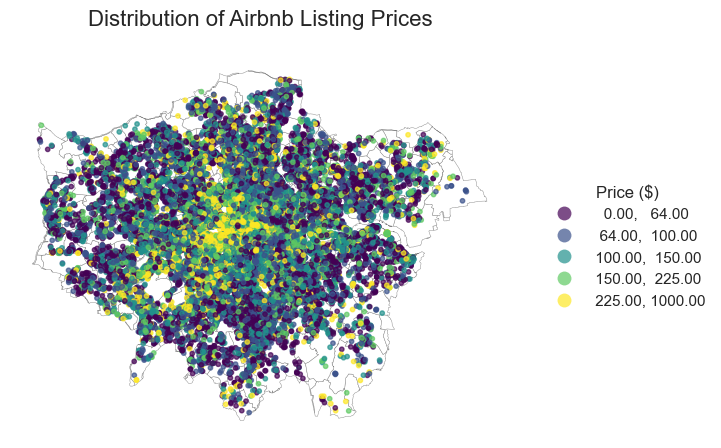

In [121]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(8, 5))

# Plot London postal districts
london_postal_district.plot(
    color='white',
    edgecolor='grey',
    linewidth=0.3,
    ax=ax
)

# Plot Airbnb listings with price color mapping
airbnb_listing_gdf.plot(
    column='price',
    scheme='quantiles',     
    cmap='viridis',        
    legend=True,         
    markersize=10,  # Increased marker size for better visibility
    alpha=0.7,  # Adjust transparency for clarity
    ax=ax
)

# Set the title and adjust its position
ax.set_title("Distribution of Airbnb Listing Prices", fontsize=16, pad=20)

# Adjust the legend to be outside the map
legend = ax.get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))  # Position the legend outside of the map
legend.set_loc('center left')  
legend.set_frame_on(False) 

# Add a title to the legend to indicate the price is in dollars
legend.set_title("Price ($)")

# Adjust subplot parameters to give more space to the plot
plt.subplots_adjust(right=0.8)  

# Remove axis for a cleaner look
ax.set_axis_off()

# Optional: show the plot with plt.show()
plt.show()


Median airbnb price lisiting in London postcode

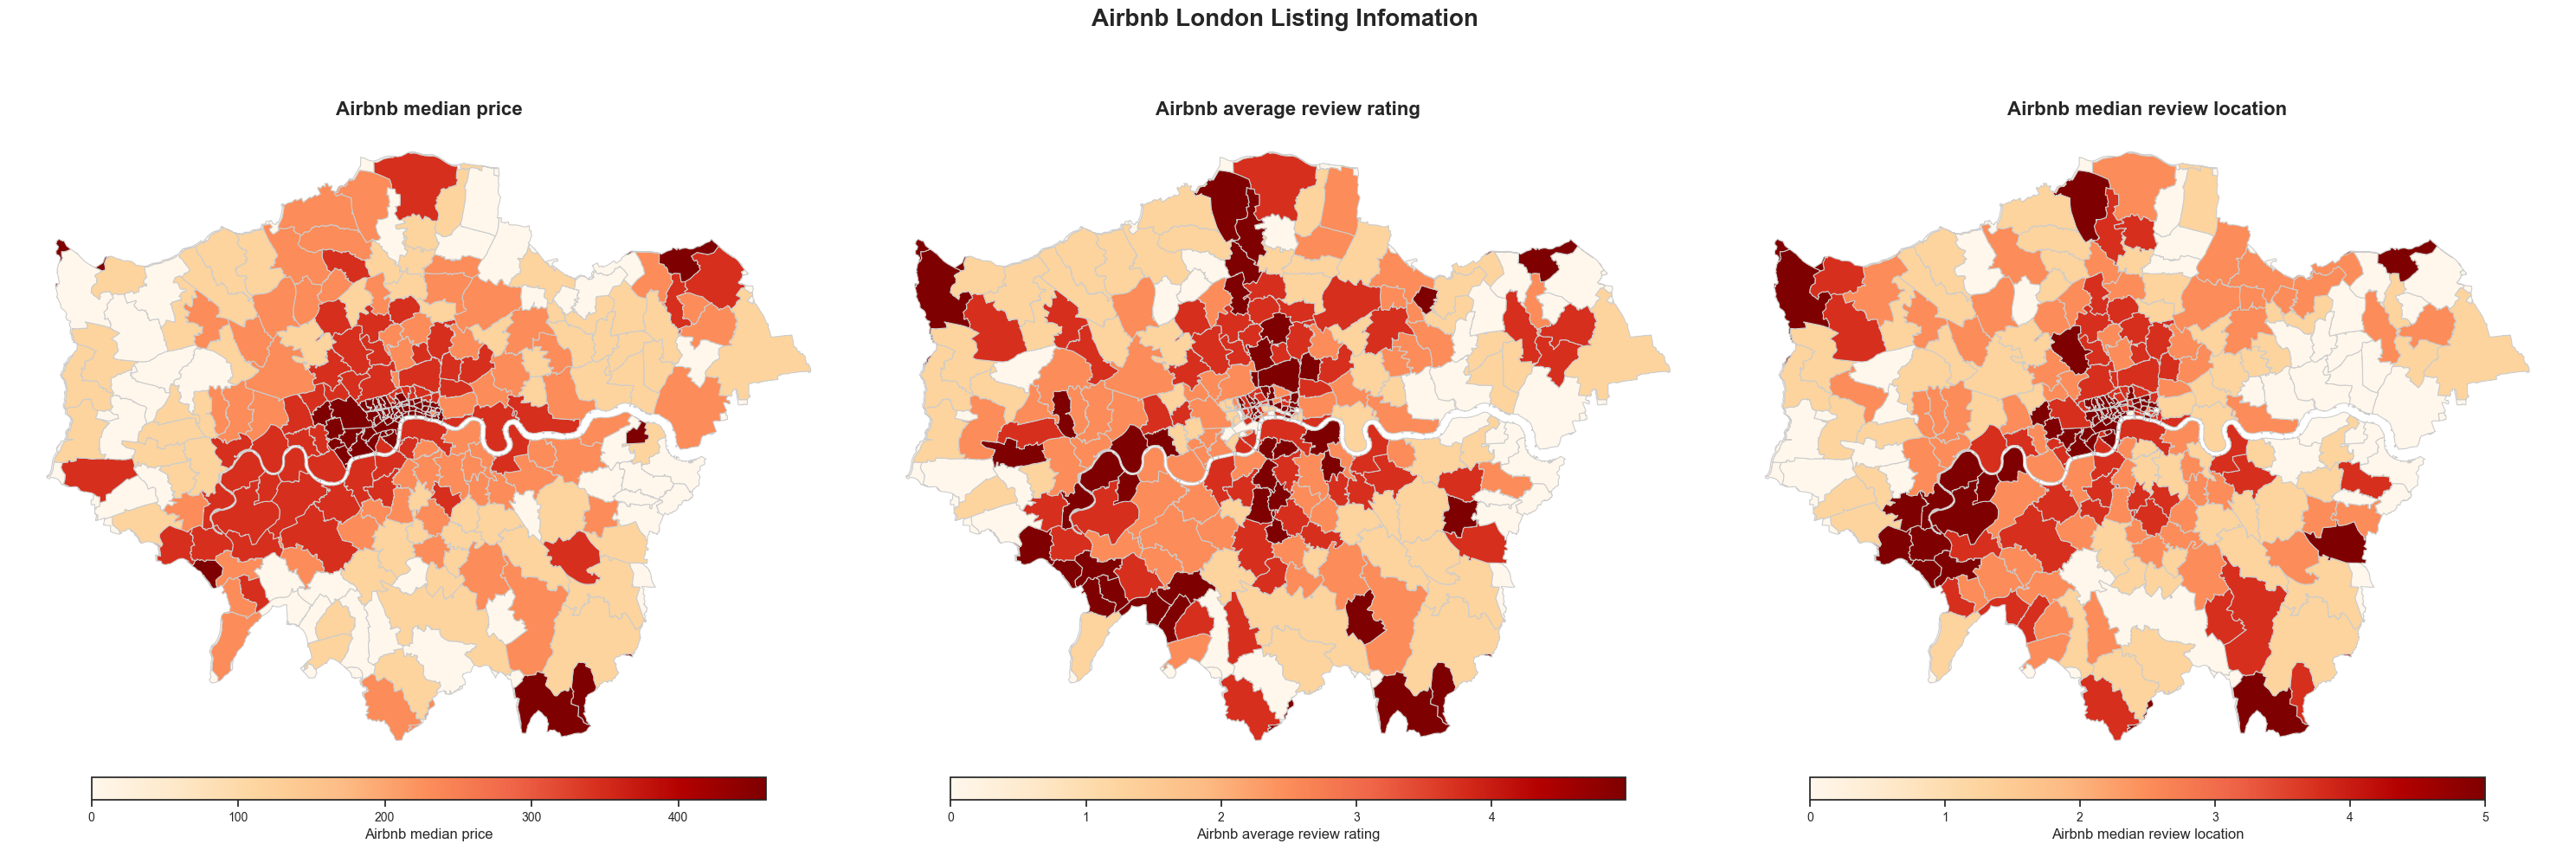

In [122]:
# Create the figure and the axes
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # Adjusted figure size

# Define the color map and normalization
cmap = 'OrRd'
norms = [plt.Normalize(vmin=london_postal_district[columns].min(), vmax=london_postal_district[columns].max()) 
         for columns in ['airbnb_median_price', 'airbnb_average_review_rating', 'airbnb_median_review_location']]

# Loop through each column and create a choropleth map in each subplot
for i, column in enumerate(['airbnb_median_price', 'airbnb_average_review_rating', 'airbnb_median_review_location']):
    # Create the choropleth map in the subplot
    ax = axs[i]
    london_postal_district.plot(column=column, cmap=cmap, scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(column.replace('_', ' ').capitalize(), fontdict={'fontsize': '16', 'fontweight': 'bold'})

    # Add a legend to the subplot
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norms[i])
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.03, pad=0.01, aspect=30)
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(column.replace('_', ' ').capitalize(), fontsize=12)

# Adjust layout to remove excess space
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a title to the entire figure
fig.suptitle('Airbnb London Listing Infomation ', fontsize=20, fontweight='bold', y=0.98)

# Show the figure
plt.show()



---

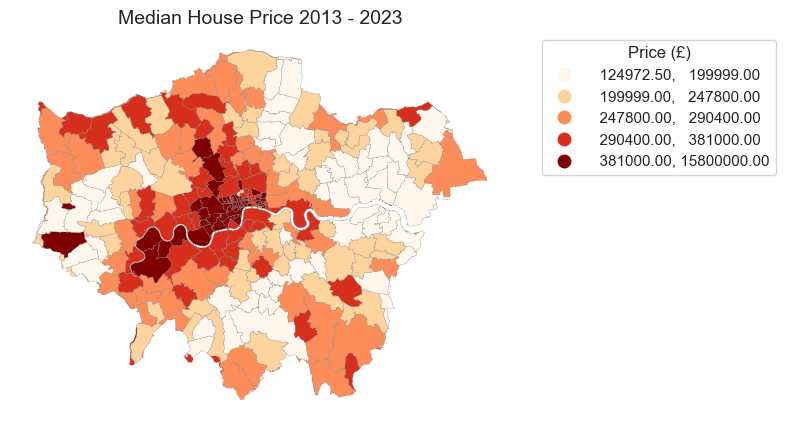

In [127]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # Adjusted figure size for better fit

# Plot the GeoDataFrame
london_postal_district.plot(column='median_price',
                            ax=ax,
                            cmap='OrRd',
                            scheme='quantiles',
                            k=5,
                            edgecolor='grey',
                            linewidth=0.2,
                            legend=True)

# Set the title and adjust its position
ax.set_title("Median House Price 2013 - 2023", fontsize=14)

# Adjust the legend to be outside the map
legend = ax.get_legend()
legend.set_bbox_to_anchor((1.05, 1))  # Position the legend outside of the map
legend.set_loc('upper left')  # Align the legend to the upper-left

# Set the legend title
legend.set_title("Price (£)")

# Adjust subplot parameters to give more space to the plot
plt.subplots_adjust(right=0.75)  # Increase right margin

ax.set_axis_off()  # Turn off the axis

# Display the plot
plt.show()


Areas in the heart of London exhibit high property prices, with the most expensive regions highlighted in the darkest colors on the map. There are also some outlier locations with elevated property prices in the western part of the city. Conversely, the eastern part shows a cluster of lower property prices.

---

In [128]:
# Create choropleth map showing the median sales of different type of hosues across London Postal Area
# Create the figure and the axes
fig, axs = plt.subplots(2, 3, figsize=(30, 15))

# Loop through each year and create a choropleth map in each subplot
for i, columns in enumerate(['Detached','Flats/Maisonettes',
                             'Other','Semi-Detached','Terraced','median_price']):
    # Calculate the subplot coordinates
    row = i // 3
    col = i % 3

    # Create the choropleth map in the subplot
    london_postal_district.plot(column=columns, cmap='OrRd',scheme='quantiles',linewidth=0.8, ax=axs[row, col], edgecolor='0.8')
    axs[row, col].axis('off')
    axs[row, col].set_title(columns, fontdict={'fontsize': '15', 'fontweight': '6'})
    
    
     # Add a legend to the subplot
    cax = fig.add_axes([0.1 + col * 0.3, 0.02 + row * 0.50, 0.15, 0.03])
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=london_postal_district[columns].min(), vmax=london_postal_district[columns].max()))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=8)

# Add a title to the entire figure
fig.suptitle('Median Prices (£)  of  Different Types of Househes Across London Postal Area', fontsize=16, fontweight='bold')



# Show the figure
plt.show()


The maps display the median prices for various house types across London. It is evident that all house types, including detached, semi-detached, flats/maisonettes, and terraced houses, exhibit higher prices in the central areas of London. 

In particular, the most expensive properties are concentrated in the heart of the city, where median prices are notably higher. The distribution of house prices shows that detached houses, which tend to be pricier overall, are predominantly located in these central areas. Semi-detached and terraced houses also follow this trend, though with slightly lower median prices compared to detached houses.

Flats and maisonettes, while generally less expensive than detached and semi-detached houses, are also concentrated in the central region, reflecting the high demand and premium pricing in these desirable areas. 

Outside the central zone, the maps reveal a gradual decline in median prices, with more affordable housing options becoming more prevalent. The western part of the city shows some outliers with higher prices, while the eastern part generally features lower property prices, reflecting a different distribution pattern across London.

---

## Findings and Conclusion


One key finding from our research is that amenities, such as the number of bedrooms and bathrooms, are not strong predictors of house prices in London, despite their significance. The correlation between the number of bathrooms and bedrooms with housing prices is around **40-45%**, indicating that while these factors contribute to pricing, they only account for about 40% of the variation in house prices.

Our analysis of Airbnb listings reveals that the majority of listings are priced below **$1,000 per night**, with a notable concentration around **$200 per night**. This left-skewed distribution suggests that while there are high-priced listings, the bulk are more affordable. The median Airbnb prices vary significantly across London boroughs, with areas like **Westminster**, **Kensington and Chelsea**, and **City of London** featuring higher prices around **$200 per night**, while boroughs such as **Southwark** and **Hackney** have more affordable median prices ranging from **$120-$125 per night**. This aligns with the higher property values and luxury status of the former compared to the more affordable nature of the latter.

Over the past decade, detached houses in London have seen a significant price increase of **18%**, while other property types, such as semi-detached and terraced houses, have experienced minimal growth or declines, with semi-detached houses rising by only **5%** and terraced houses decreasing by **7%**. This trend indicates a growing desirability for detached homes due to their size and perceived value. Additionally, Airbnb rental prices reflect broader real estate market trends, with higher rental prices in more expensive neighborhoods and lower prices in less affluent areas. Overall, while high-value boroughs maintain elevated Airbnb prices, other variables like property characteristics and location-specific factors play a crucial role in pricing dynamics.

## References

1. Anselin, L. (2010). *Spatial econometrics: Methods and models*. Springer. 

2. Cressie, N. (1993). *Statistics for spatial data*. Wiley. 

3. Darribas, I. (n.d.). Geovisualization with PySAL. *Geographic Data Science*, Lab 8. Retrieved from https://darribas.org/gds_course/content/bH/lab_H.html

4. Fortin, M.-J., & Dale, M. R. T. (2005). *Spatial analysis: A guide for ecologists*. Cambridge University Press. 

5. Getis, A., & Ord, J. K. (2010). *The spatial dependence of the distribution of urban land uses*. In *Spatial statistics and spatial econometrics* (pp. 137-160). Springer. 

6. LaFlamme, M., & Black, A. L. (2012). *Introduction to spatial statistics*. Springer. 

7. PySAL Developers. (n.d.). Moran’s I visualization. *PySAL*. Retrieved from https://pysal.org/notebooks/viz/splot/esda_morans_viz.html

8. Rey, S. J., & Anselin, L. (2021). Point pattern analysis. *Geographic Data Science*, Chapter 8. Retrieved from https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html

9. Waller, L. A., & Gotway, C. A. (2004). *Applied spatial statistics for public health data*. Wiley. 

10. Polars Documentation: DateTime. (n.d.). Retrieved from https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.datetime.html

11. Spatial Autocorrelation for Areal Unit Data. (n.d.). Retrieved from https://nbviewer.org/github/pysal/esda/blob/main/notebooks/Spatial%20Autocorrelation%20for%20Areal%20Unit%20Data.ipynb

12.  Airbnb. (n.d.). Retrieved from https://insideairbnb.com/get-the-data/
13. https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

## APPENDIX

I had planned to run a Geographically Weighted Regression (GWR) after conducting the OLS regression. However, the GWR library (mgwr) encountered an error that I was unable to debug, and there is no comprehensive documentation available to resolve the issue. Consequently, I decided to proceed with the OLS regression to measure the relationships. Despite this, I was able to identify spatial patterns and draw conclusions using the spatial lag and geospatial visualizations I generated.

I will attempt to open an issue with the library’s maintainers to investigate the cause of the error and seek a resolution.